In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis

In [5]:
df.duplicated('policy_number').sum()

0

In [6]:
df.duplicated('policy_number').sum()

0

In [7]:
df.isin([' ', 'NA', '-']).sum().any()

False

In [8]:
df = df.replace('?', np.NaN)

# Missing value check

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                             Missing Values  %Missing data
_c39                                   1000          100.0
property_damage                         360           36.0
police_report_available                 343           34.3
collision_type                          178           17.8
authorities_contacted                    91            9.1
bodily_injuries                           0            0.0
incident_state                            0            0.0
incident_city                             0            0.0
incident_location                         0            0.0
incident_hour_of_the_day                  0            0.0
number_of_vehicles_involved               0            0.0
fraud_reported                            0            0.0
auto_year                                 0            0.0
auto_model                                0            0.0
total_claim_amount                        0            0.0
injury_claim                              0            0

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)


In [11]:
df.drop(['_c39', 'incident_location', 'insured_zip', 'policy_number'],axis=1, inplace= True)

### Missing value check after imputation

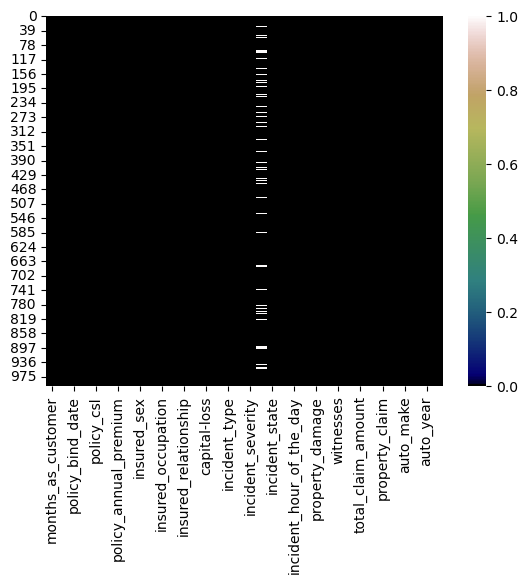

In [12]:
sns.heatmap(df.isnull(),cmap='gist_earth')
plt.show()

In [13]:
df['CSL_Personal']= df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']= df.policy_csl.str.split('/',expand=True)[1]

In [14]:
df.drop('policy_csl', axis=1, inplace=True)

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month']= df['policy_bind_date'].dt.month
df['policy_bind_year']= df['policy_bind_date'].dt.year

df['incident_day']= df['incident_date'].dt.day
df['incident_month']= df['incident_date'].dt.month
df['incident_year']= df['incident_date'].dt.year

In [17]:
df.drop(['policy_bind_date', 'incident_date'],axis = 1, inplace=True)

In [18]:
df.drop(['incident_year'], axis=1,inplace=True)

In [19]:
df['Automobile_Age']=2015 -df ['auto_year']

df.drop('auto_year', axis=1,inplace=True)

In [20]:
Category = ['policy_state','insured_sex', 'insured_education_level', 'insured_occupation', 
           'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type','incident_severity',
           'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available',
           'auto_make', 'auto_model', 'fraud_reported']

Numerical = ['months_as_customer', 'CSL_Personal', 'CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
            'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
            'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age', 'policy_annual_permium']

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

### Statistical Matrix

In [13]:
df.describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='RdPu')

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

In [14]:
pip install --upgrade jinja2


Note: you may need to restart the kernel to use updated packages.


In [15]:
df[Category].describe().T

NameError: name 'Category' is not defined

In [25]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

### Start exploring target variable

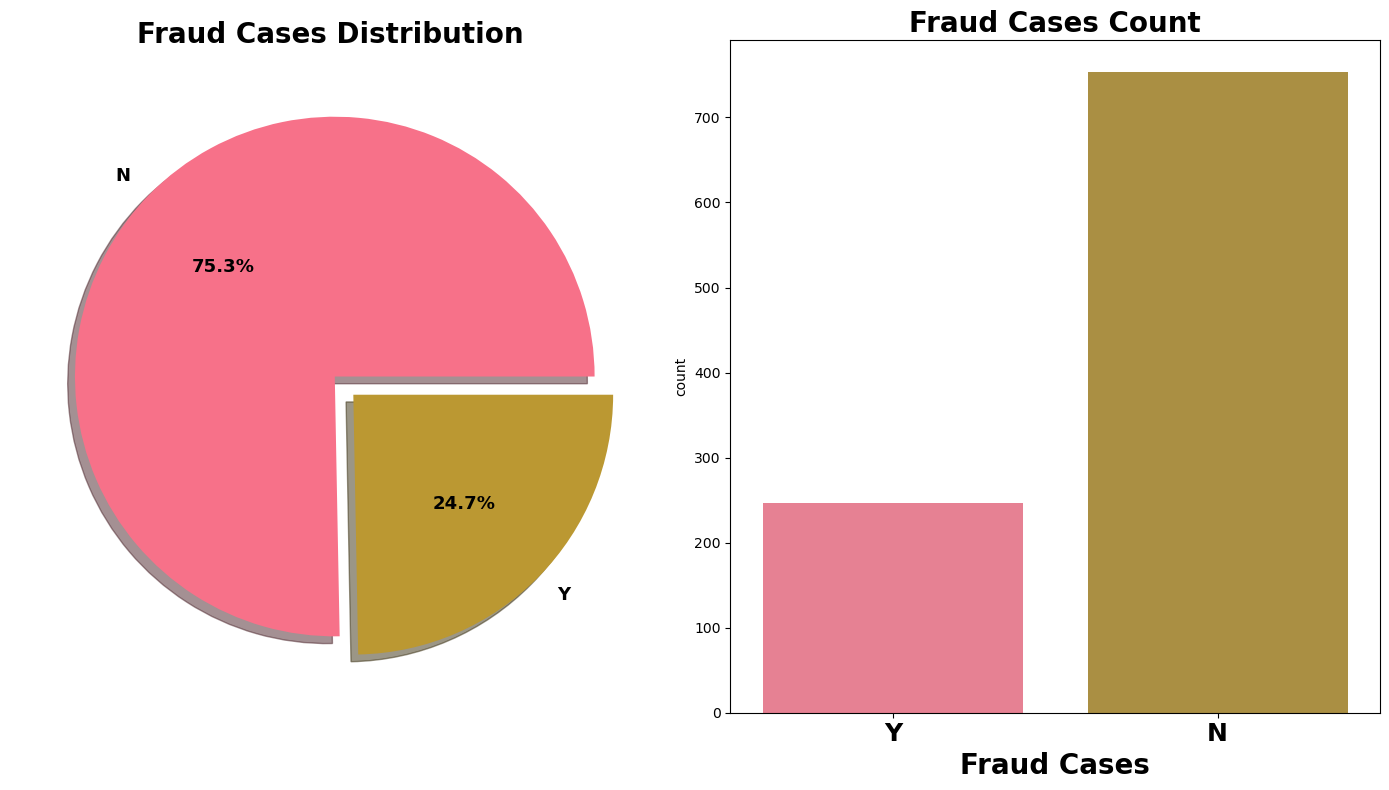

In [26]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Fraud Cases Distribution ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported', data=df, ax=ax[1])
ax[1].set_title('Fraud Cases Count', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Fraud Cases', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.show()

## Analysing Age vs Fraud 

In [27]:
print('Minimum Age :', df.age.min(), 'Years')
print('Maximum Age :', df.age.max(), 'Years')
print('Average Age :', df.age.mean(), 'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


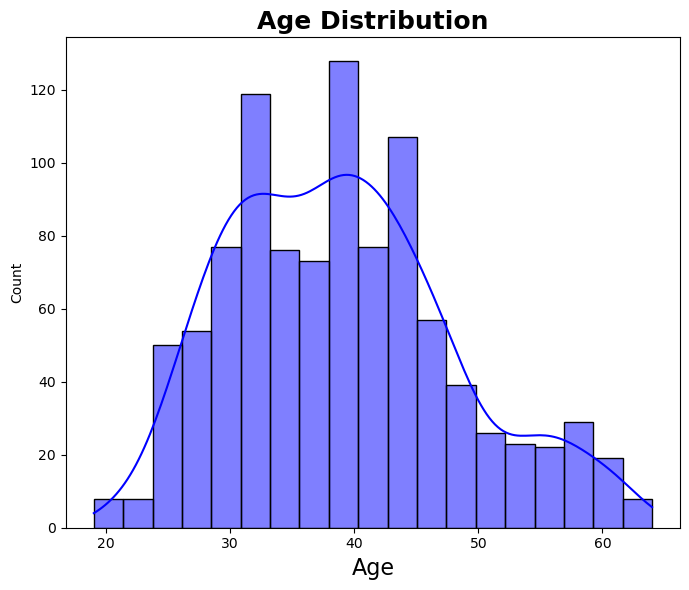

In [28]:
plt.figure(figsize =(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age', fontsize=16)
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.show()

In [29]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70],
                       include_lowest= True, labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

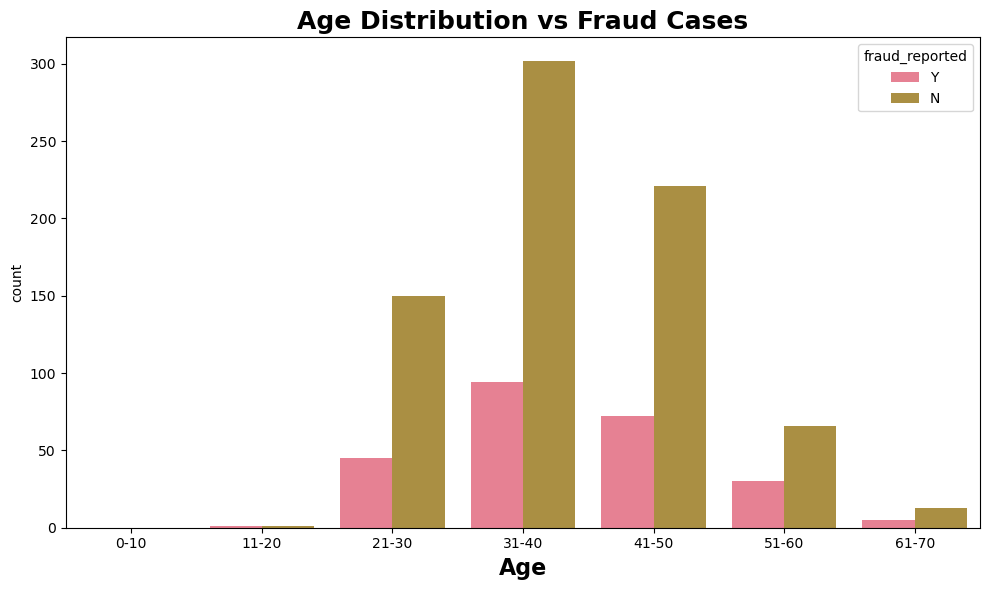

In [30]:
plt.figure(figsize =(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.title('Age Distribution vs Fraud Cases', fontsize=18, fontweight='bold')
plt.show()

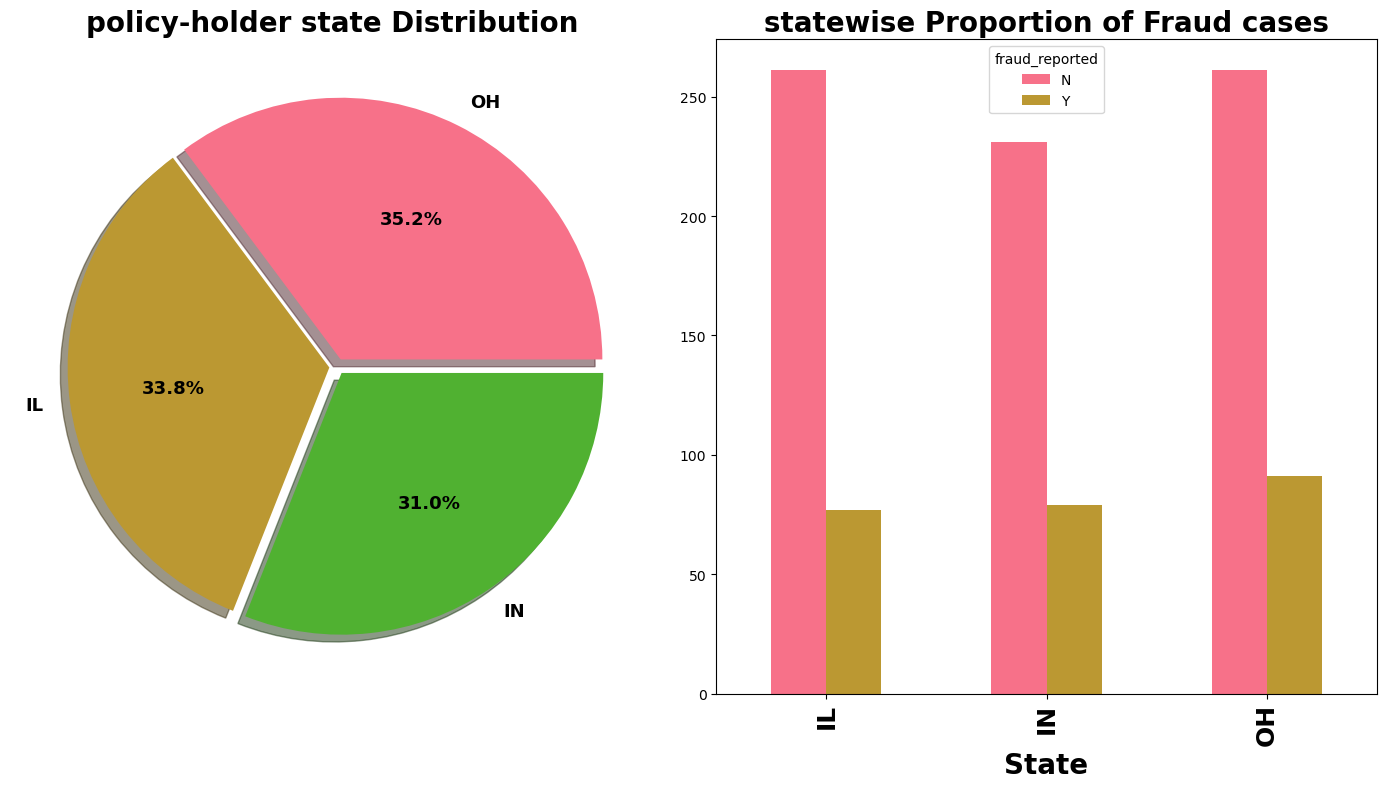

In [31]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('policy-holder state Distribution ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('statewise Proportion of Fraud cases', fontsize=20, fontweight='bold')
ax[1].set_xlabel('State', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Insured Gender vs Fraud cases

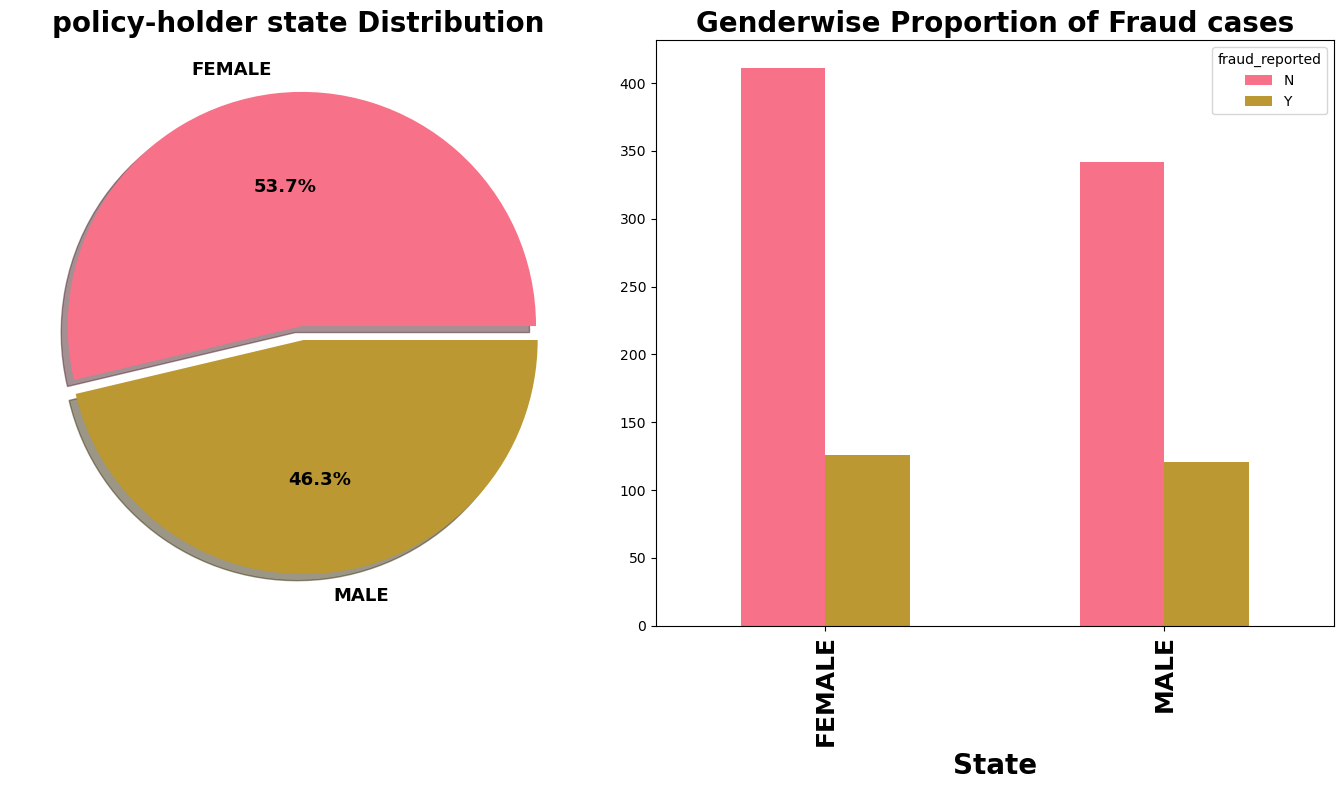

In [32]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('policy-holder state Distribution ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases', fontsize=20, fontweight='bold')
ax[1].set_xlabel('State', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Education level vs fraud cases

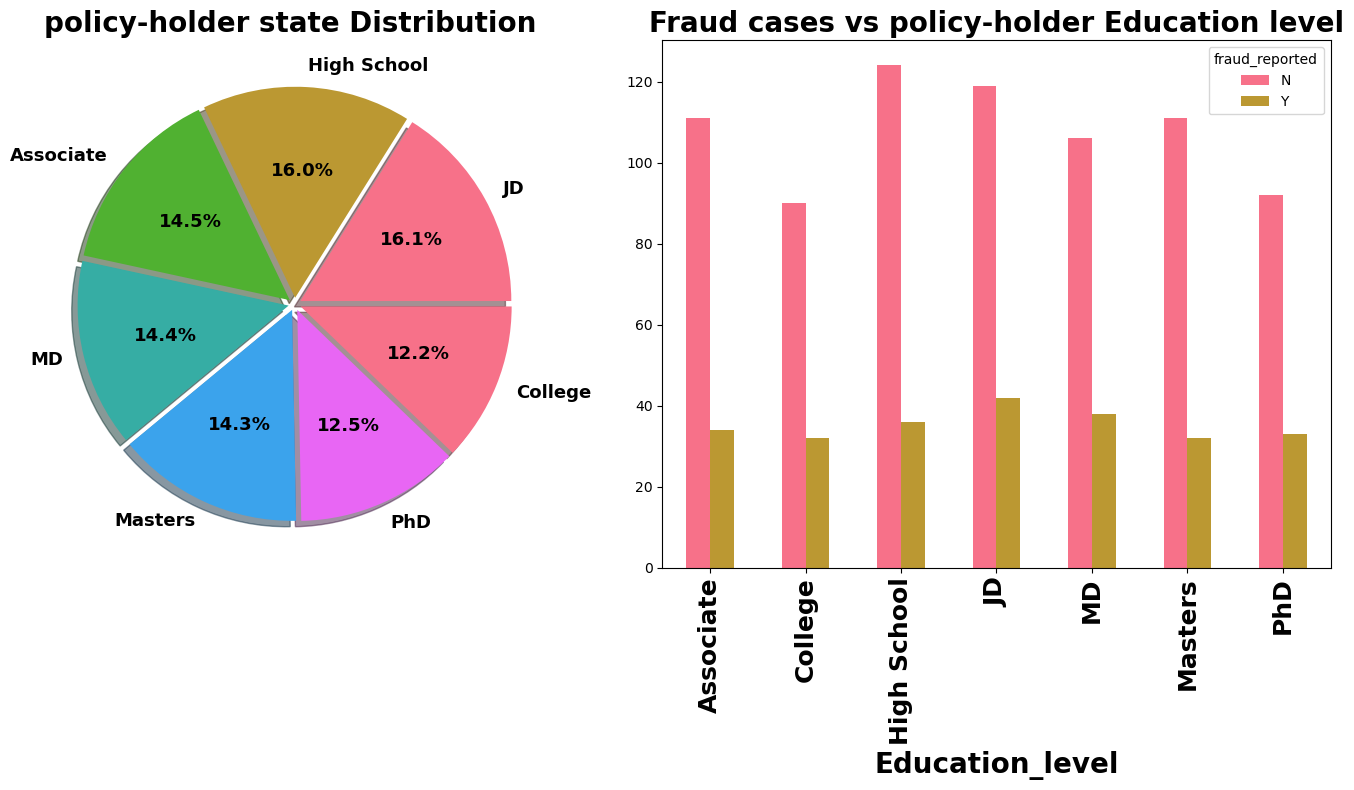

In [33]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('policy-holder state Distribution ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs policy-holder Education level', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Education_level', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

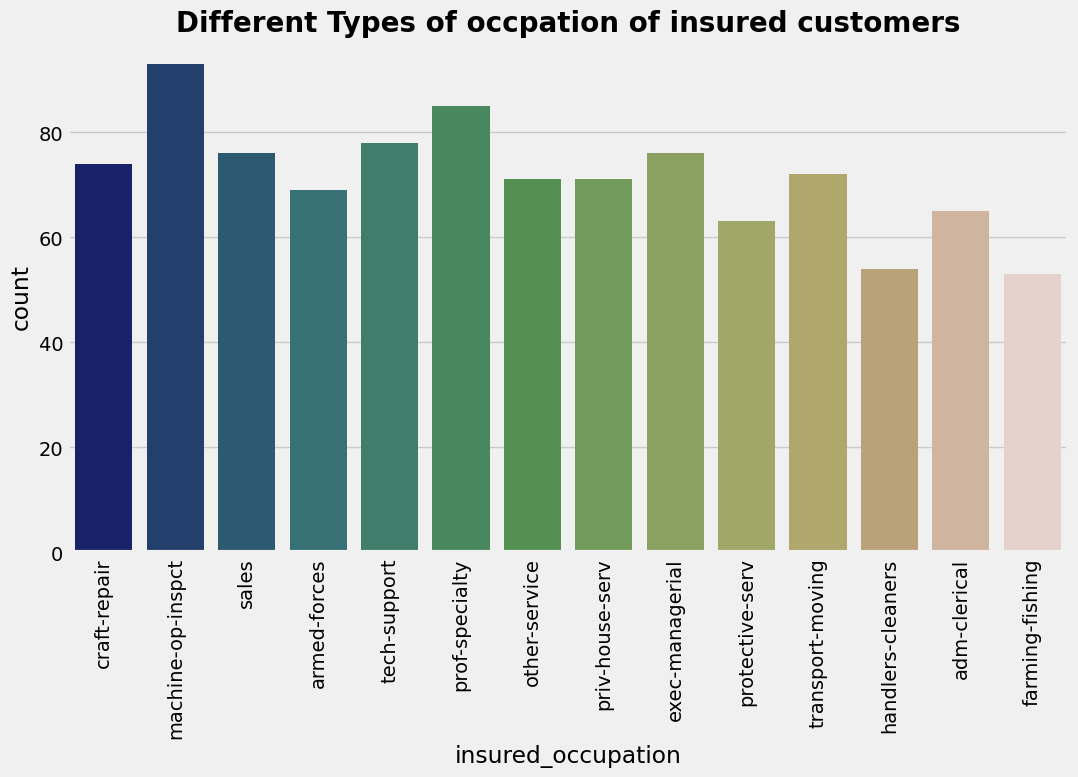

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of occpation of insured customers', fontsize=20, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.show()

### Hobbies of Insured Customers

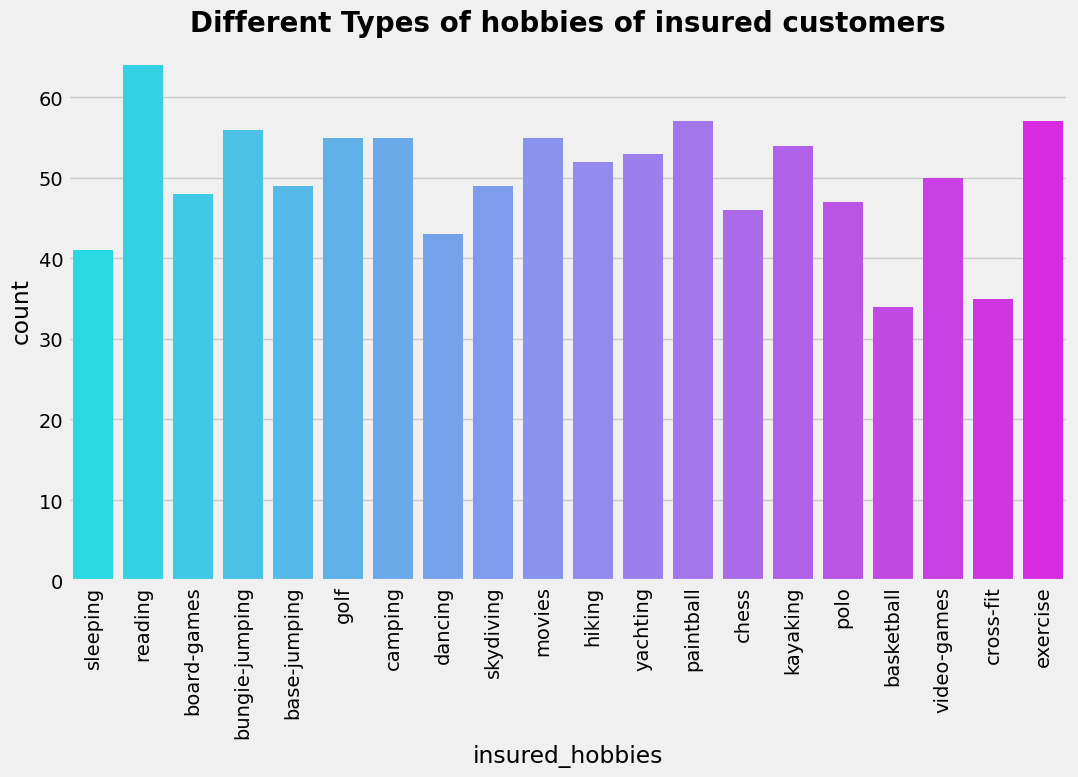

In [35]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of hobbies of insured customers', fontsize=20, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.show()

### Different Types of Incidents vs fraud cases

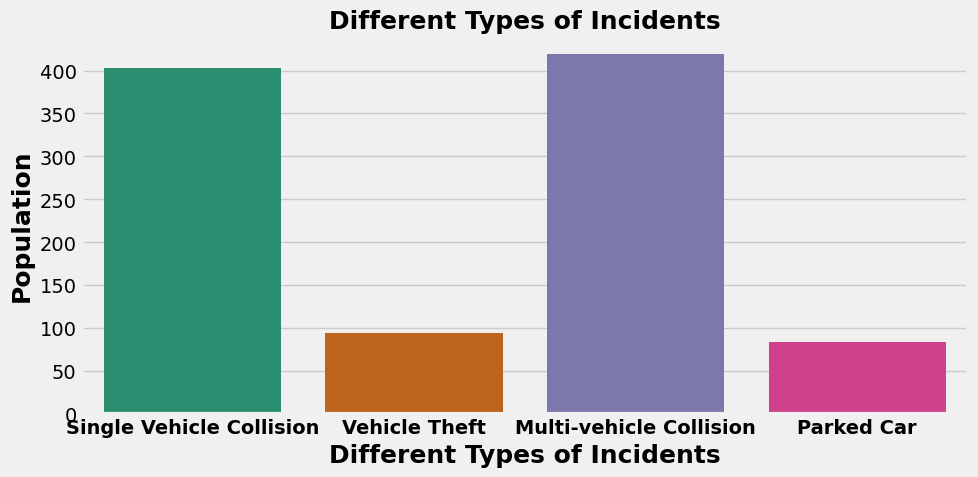

In [36]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette= 'Dark2')
plt.title('Different Types of Incidents', fontsize=18, fontweight= 'bold')
plt.xlabel('Different Types of Incidents', fontsize=18, fontweight= 'bold')
plt.ylabel('Population', fontsize=18, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

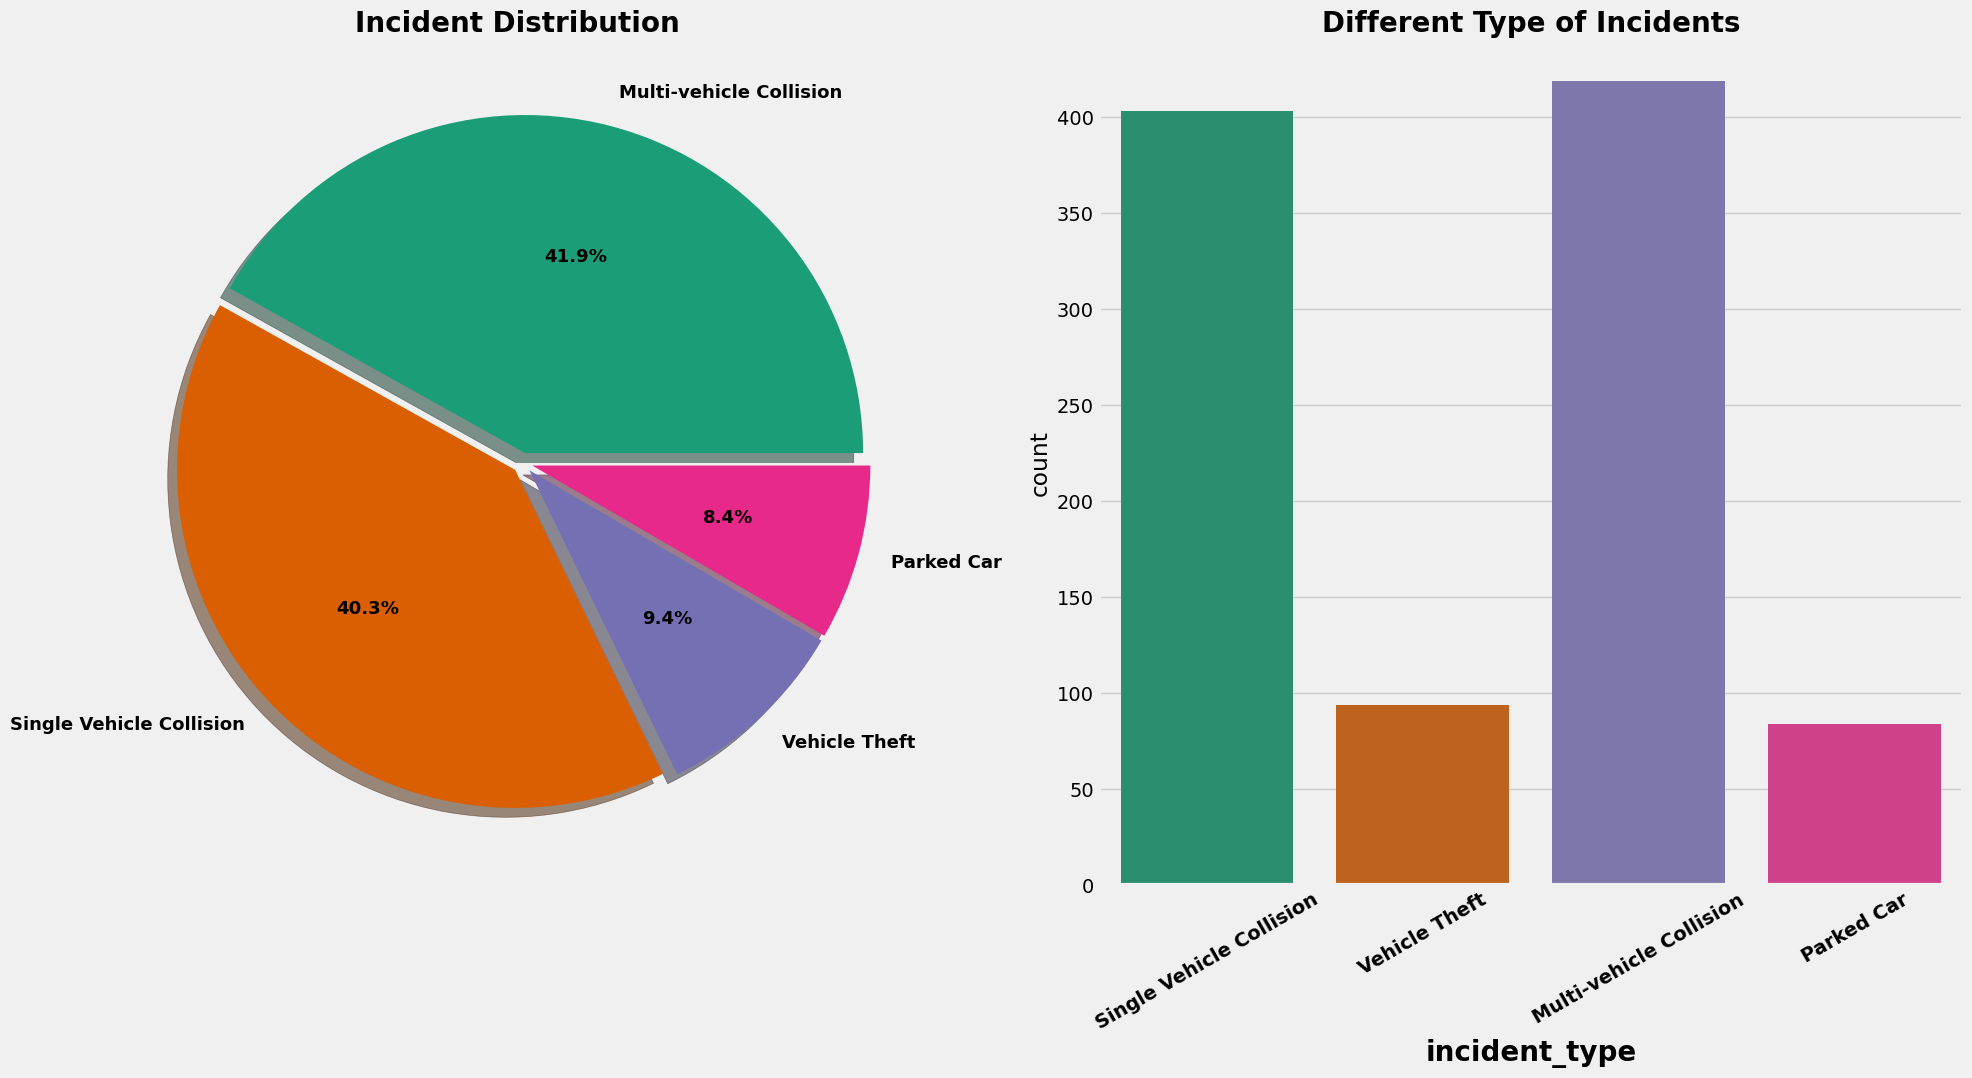

In [37]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Incident Distribution ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

sns.countplot('incident_type', data=df, ax=ax[1])
ax[1].set_title('Different Type of Incidents', fontsize=20, fontweight='bold')
ax[1].set_xlabel('incident_type', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, rotation=30, fontweight='bold')
plt.tight_layout()
plt.show()

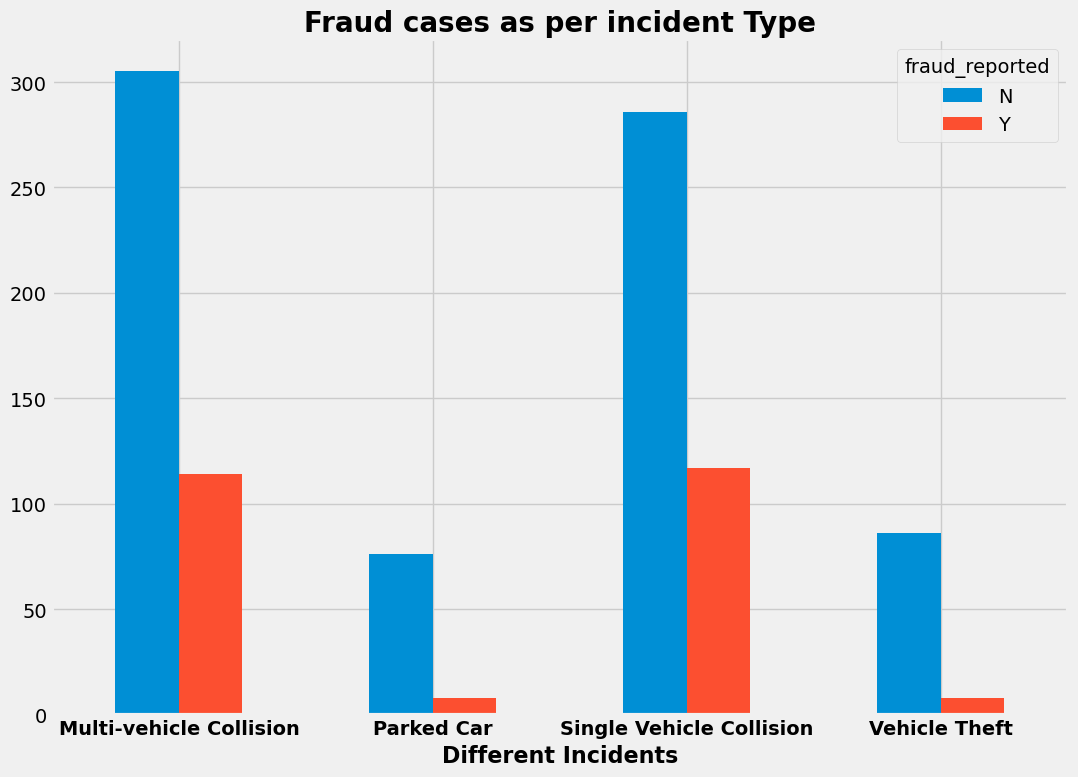

In [38]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases as per incident Type', fontsize=20, fontweight= 'bold')
plt.xlabel('Different Incidents', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.show()

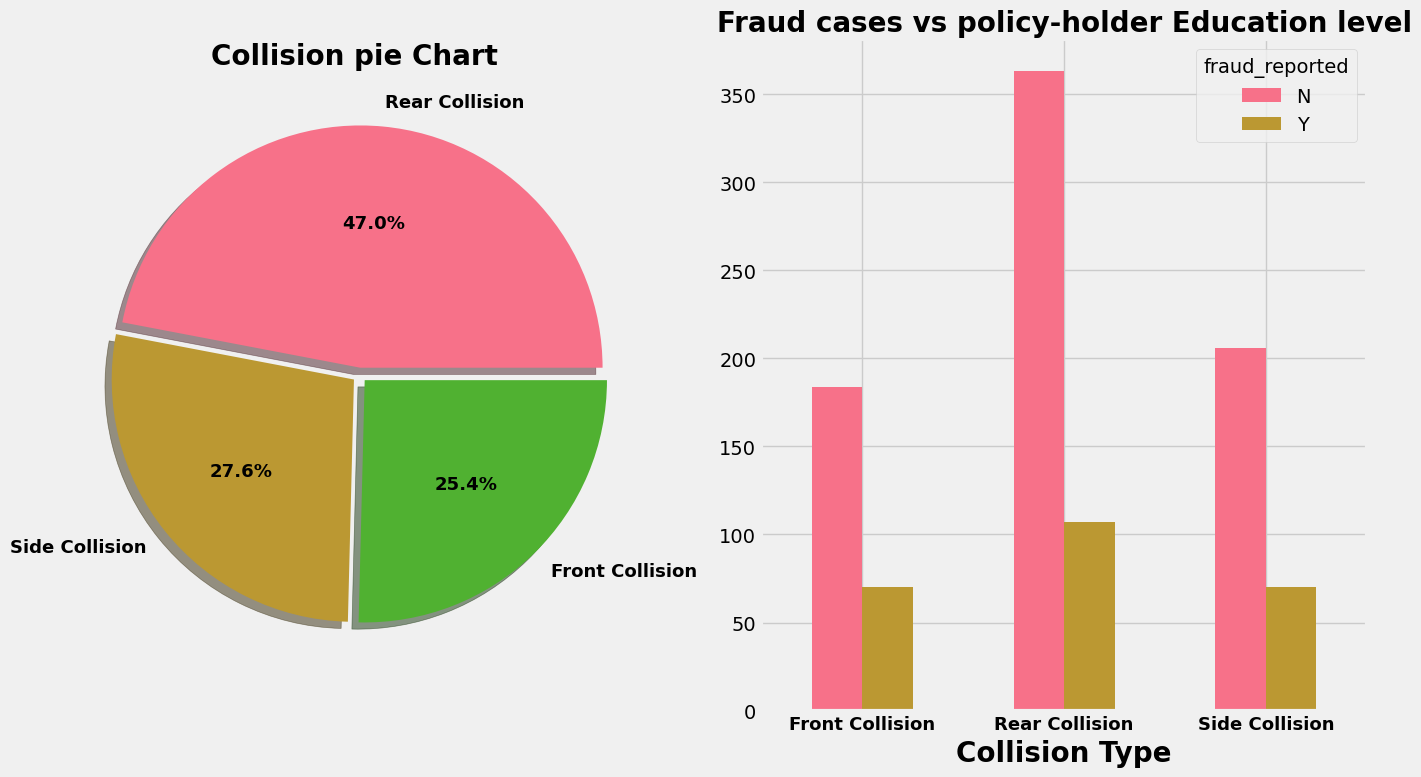

In [39]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Collision pie Chart ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs policy-holder Education level', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Collision Type', fontsize=20, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

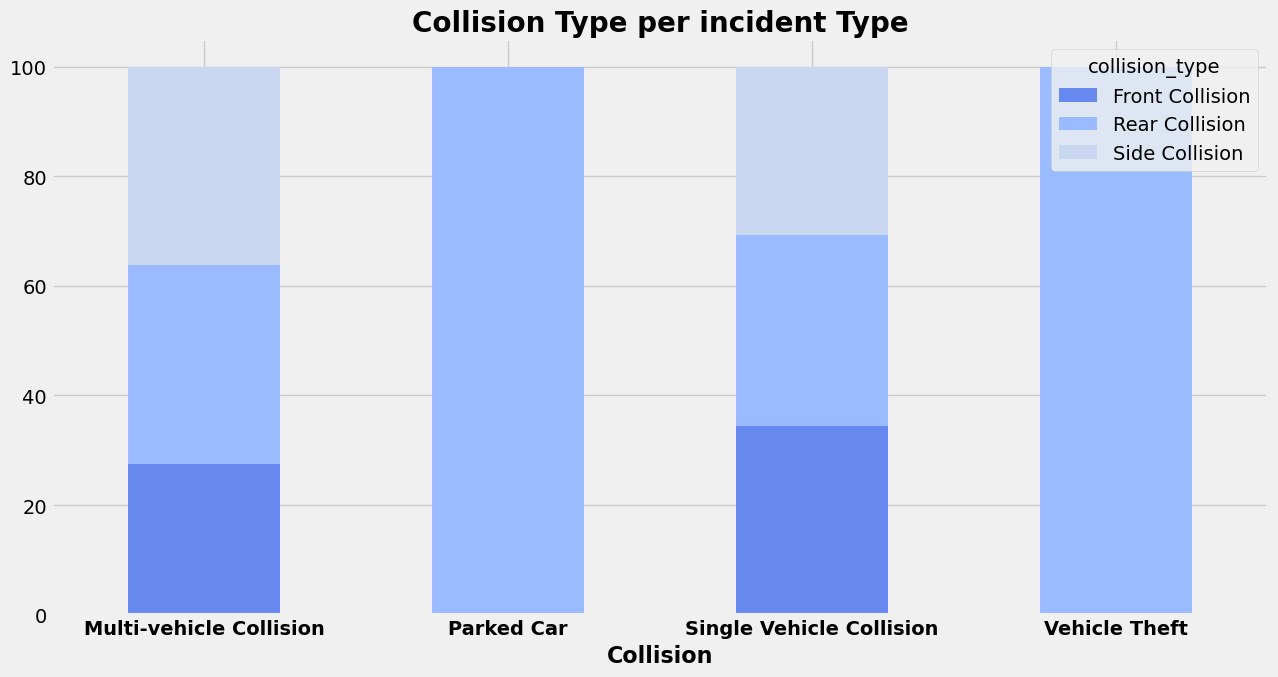

In [40]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar', stacked=True)
plt.title('Collision Type per incident Type', fontsize=20, fontweight= 'bold')
plt.xlabel('Collision', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.show()

### Collision vs Inccident Severity

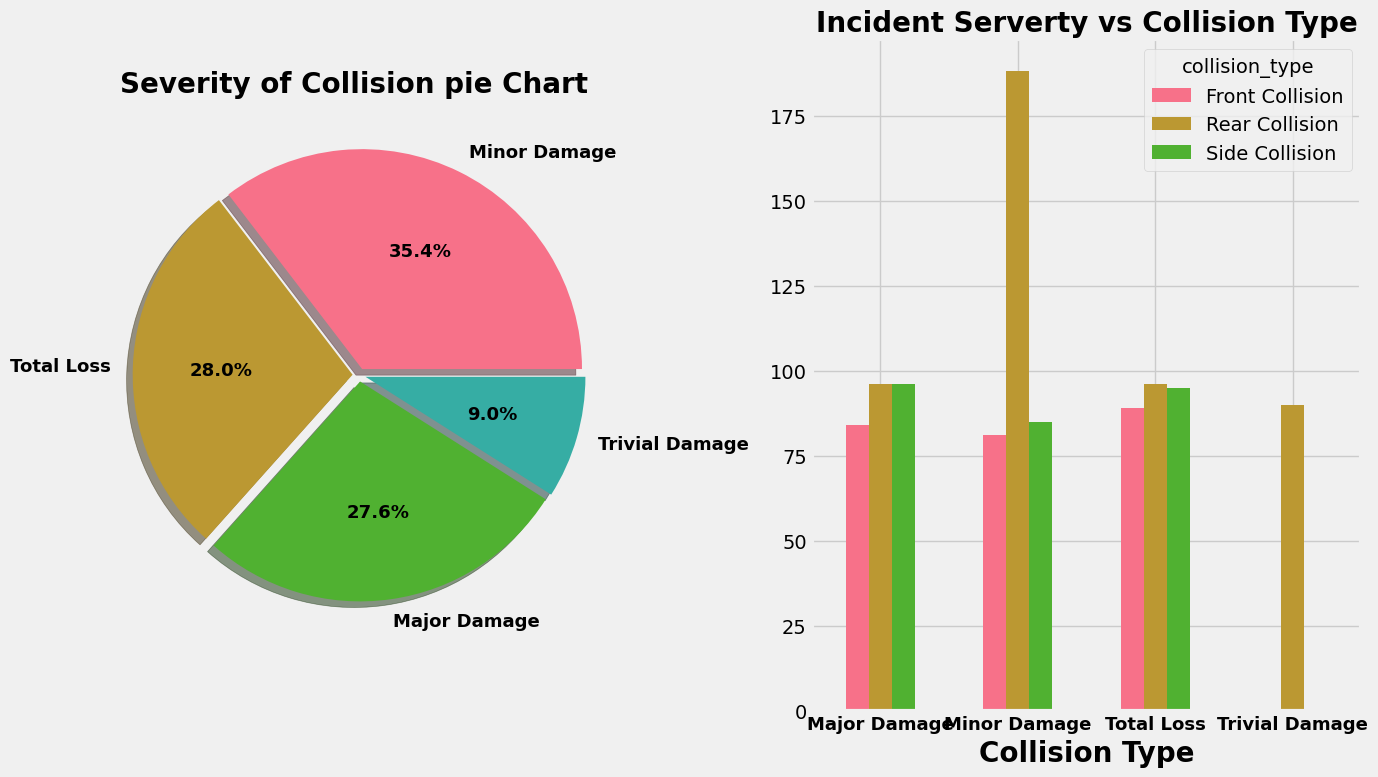

In [41]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,8))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Severity of Collision pie Chart ', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Serverty vs Collision Type', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Collision Type', fontsize=20, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

In [42]:
pd.crosstab(df['incident_type'],df['incident_severity']).T.style.background_gradient(cmap= 'summer_r')

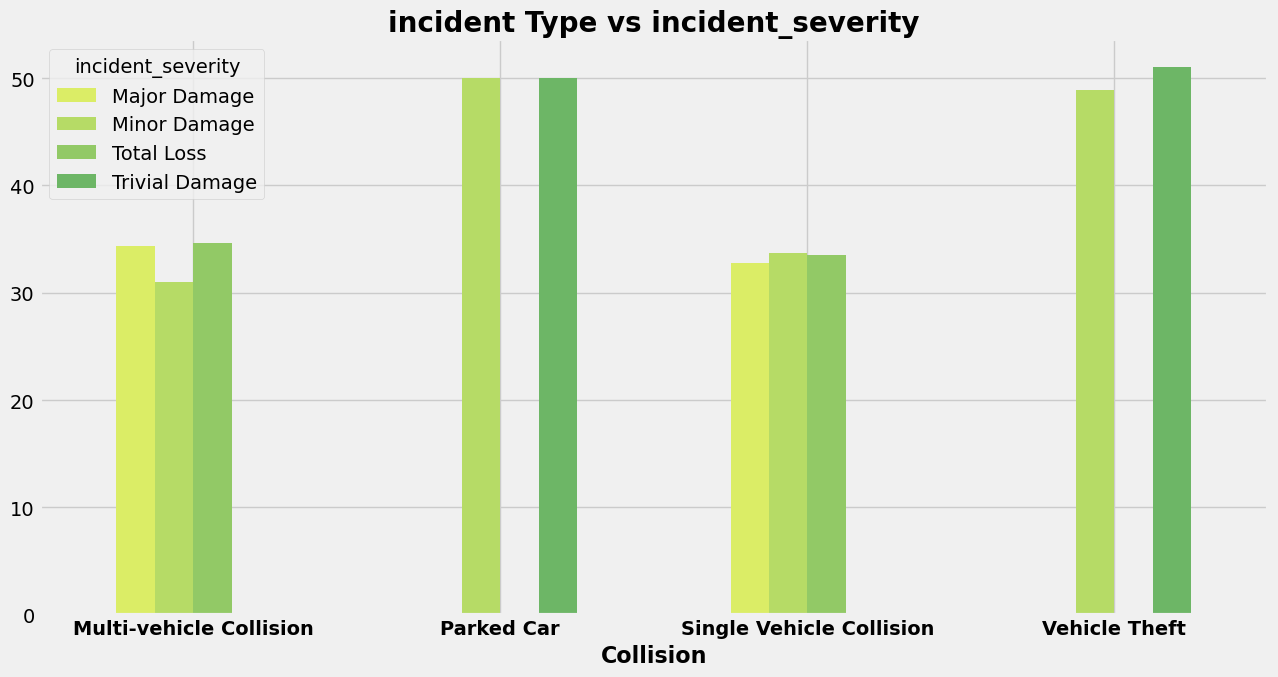

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title('incident Type vs incident_severity', fontsize=20, fontweight= 'bold')
plt.xlabel('Collision', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.show()

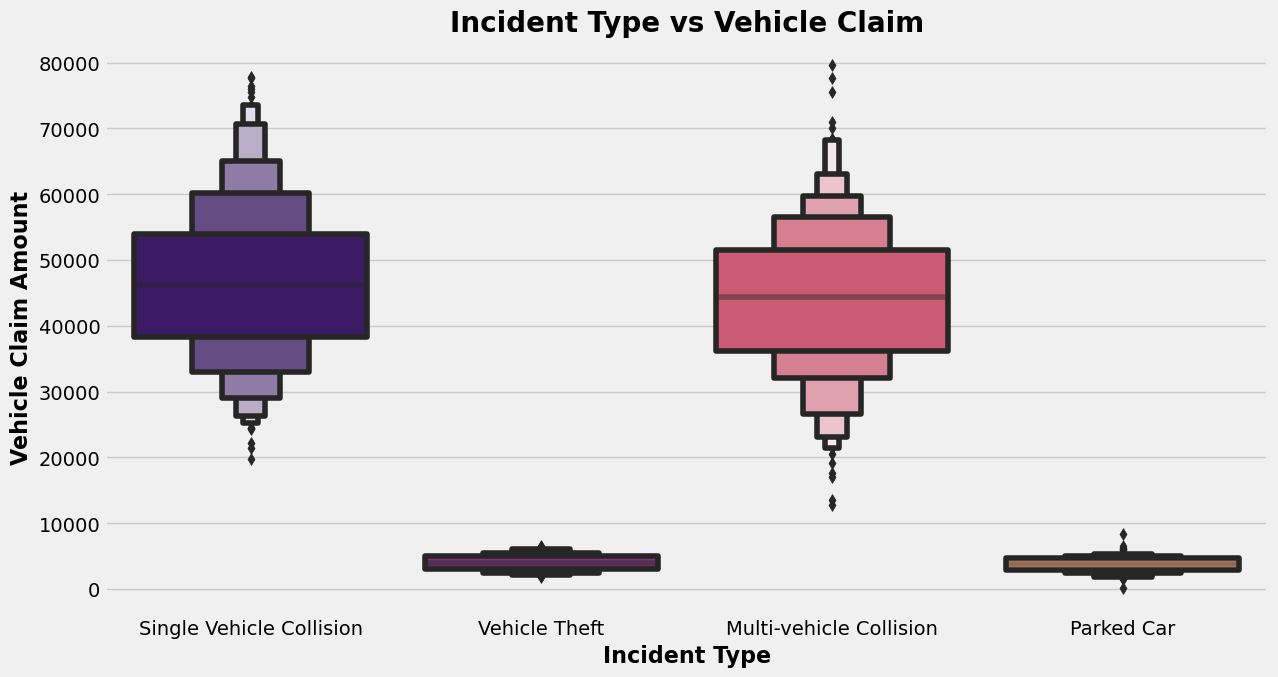

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim', fontsize=20, fontweight= 'bold')
plt.xlabel('Incident Type', fontsize=16, fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16, fontweight='bold')
plt.show()

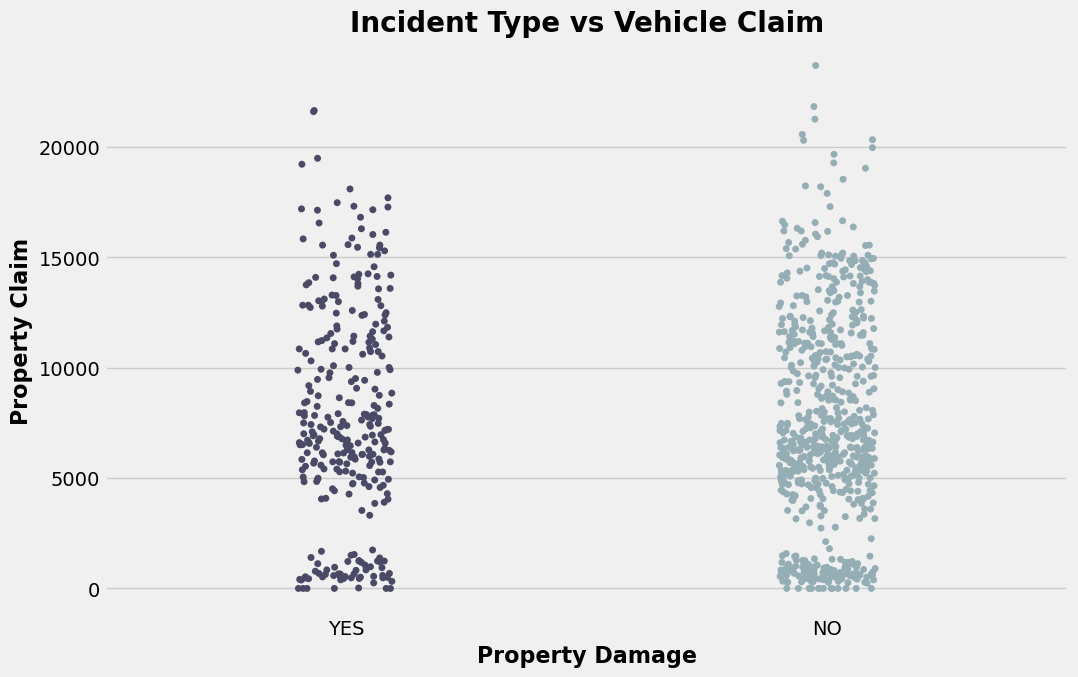

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim', fontsize=20, fontweight= 'bold')
plt.xlabel('Property Damage', fontsize=16, fontweight='bold')
plt.ylabel('Property Claim ', fontsize=16, fontweight='bold')
plt.show()

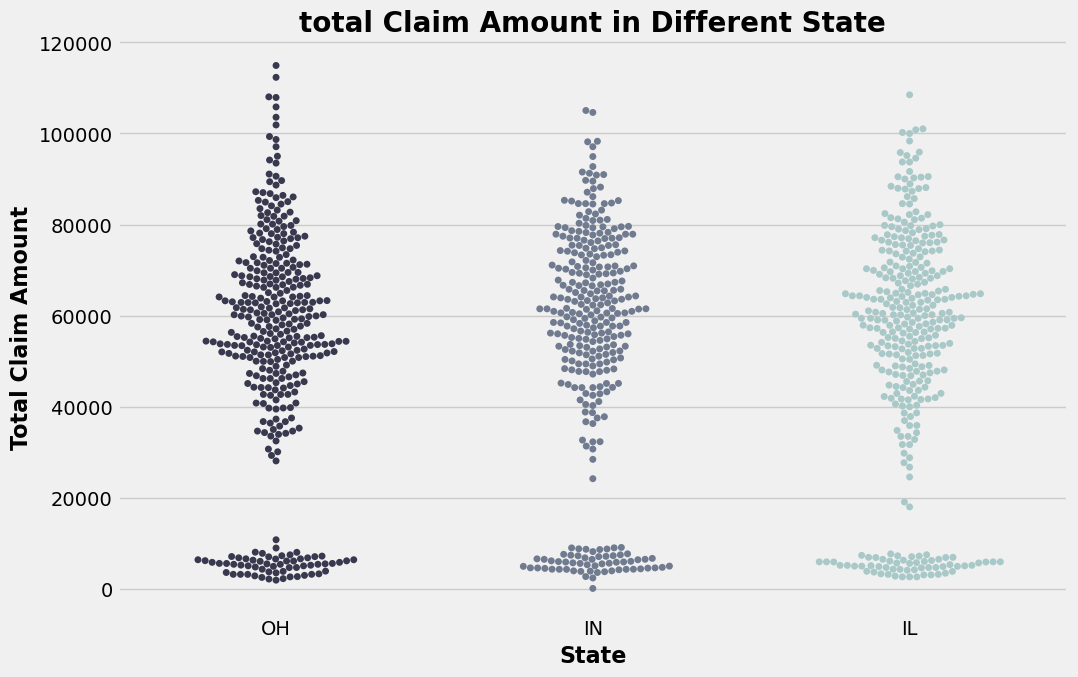

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'bone')
plt.title('total Claim Amount in Different State', fontsize=20, fontweight= 'bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()

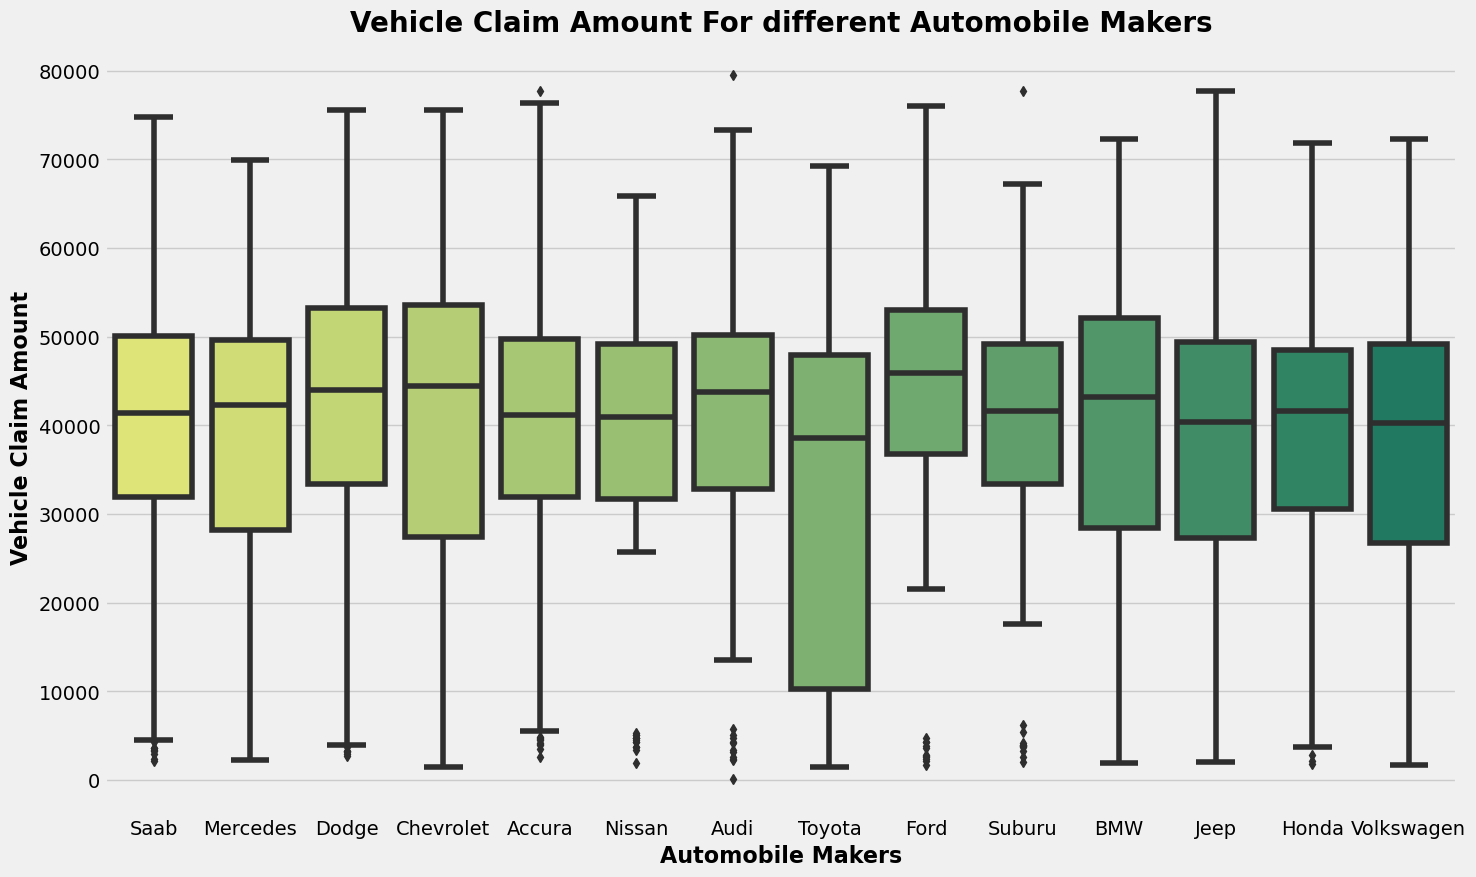

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount For different Automobile Makers', fontsize=20, fontweight= 'bold')
plt.xlabel('Automobile Makers', fontsize=16, fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16, fontweight='bold')
plt.show()

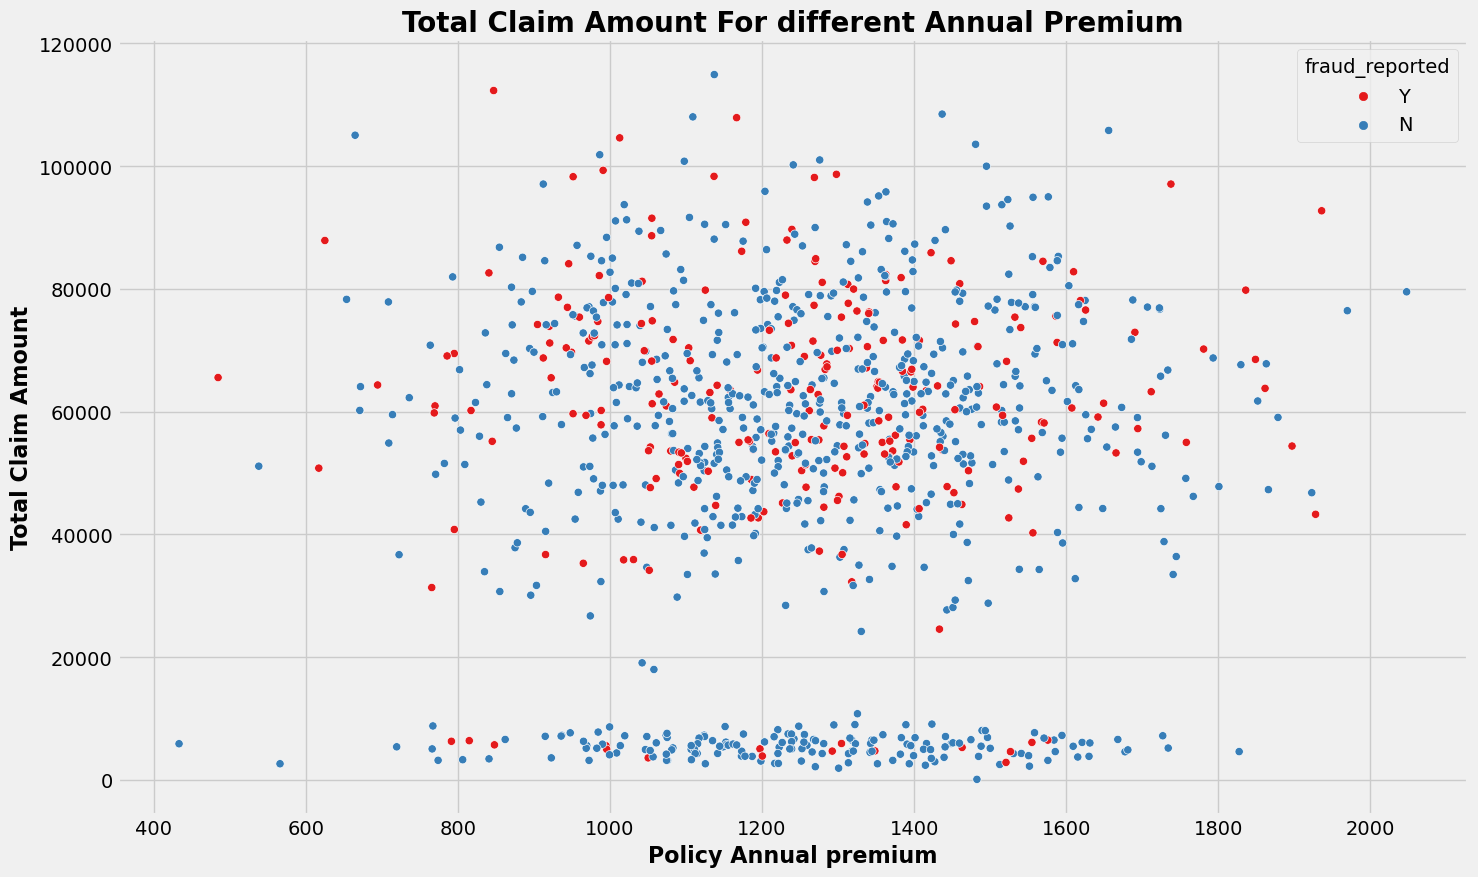

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue= df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount For different Annual Premium', fontsize=20, fontweight= 'bold')
plt.xlabel('Policy Annual premium', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()

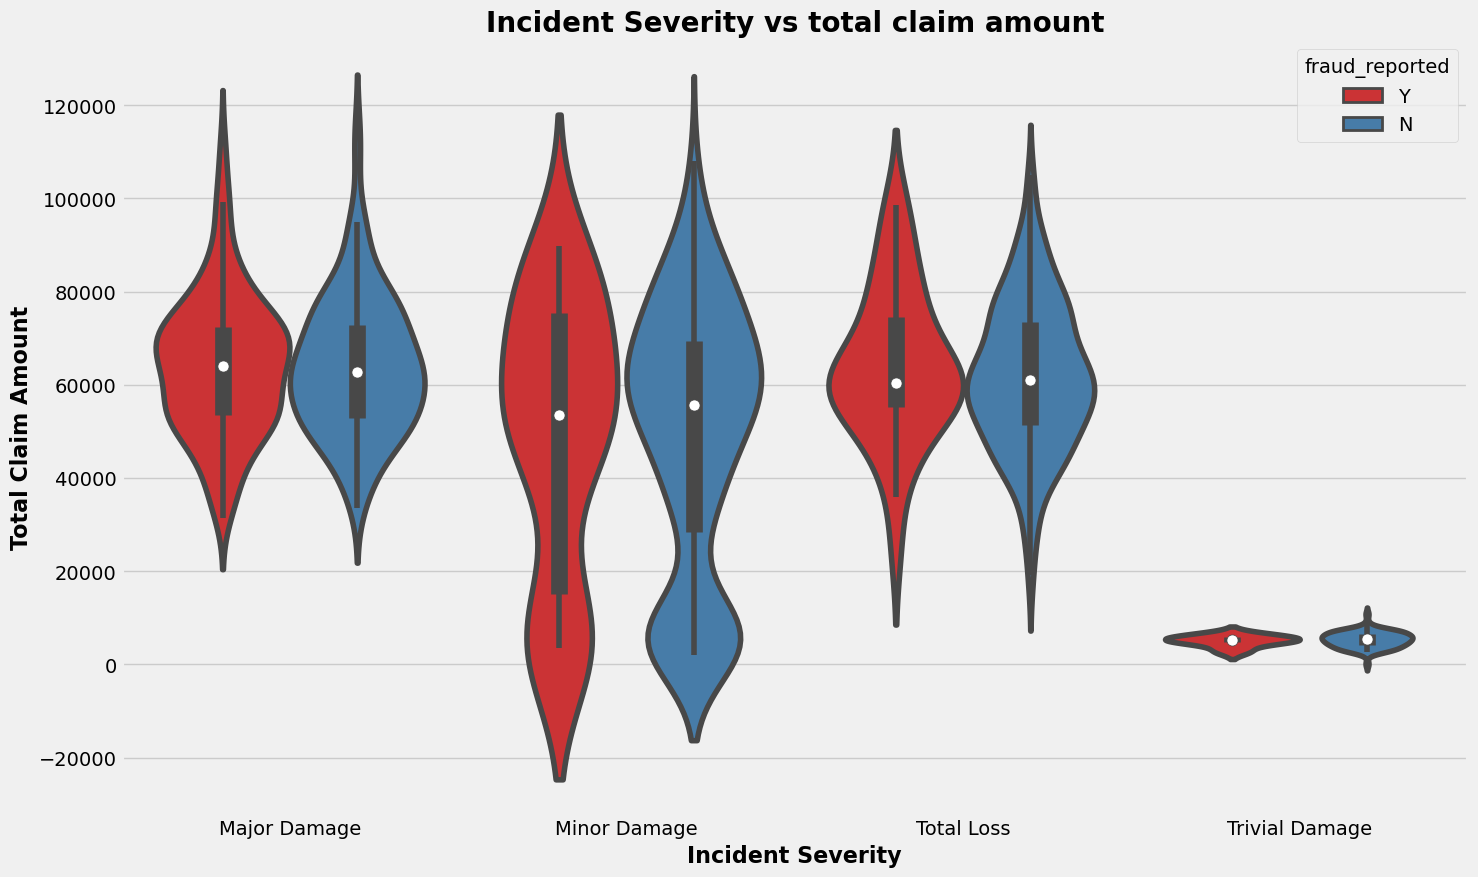

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.violinplot(df['incident_severity'], df['total_claim_amount'], hue= df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity vs total claim amount', fontsize=20, fontweight= 'bold')
plt.xlabel('Incident Severity', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()

In [50]:
pd.set_option('display.max_columns',None)
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                9   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding categorical data

In [51]:
Category = ['policy_state', 'insured_sex', 'insured_education_level','insured_occupation',
           'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
           'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available',
           'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  umbrella_limit  \
0                 328   48             2               1000               0   
1                 228   42             1               2000         5000000   
2                 134   29             2               2000         5000000   
3                 256   41             0               2000         6000000   
4                 228   44             0               1000         6000000   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   
2            0                        6                  11                2   
3            0                        6                   1                2   
4            1                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                9   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25               1   
1                  6              2006            21               1   
2                  6              2000            22       

In [60]:
df.drop(['policy_annual_premium'], axis =1, inplace = True)

In [73]:
df.columns.to_series().groupby(df.dtypes).groups

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'numpy.dtype[int64]'

## Featue selection and Engineering

### 1. Outliers Detection and Removal 

In [75]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
            'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
            'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day',
            'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [76]:
len(Numerical)

21

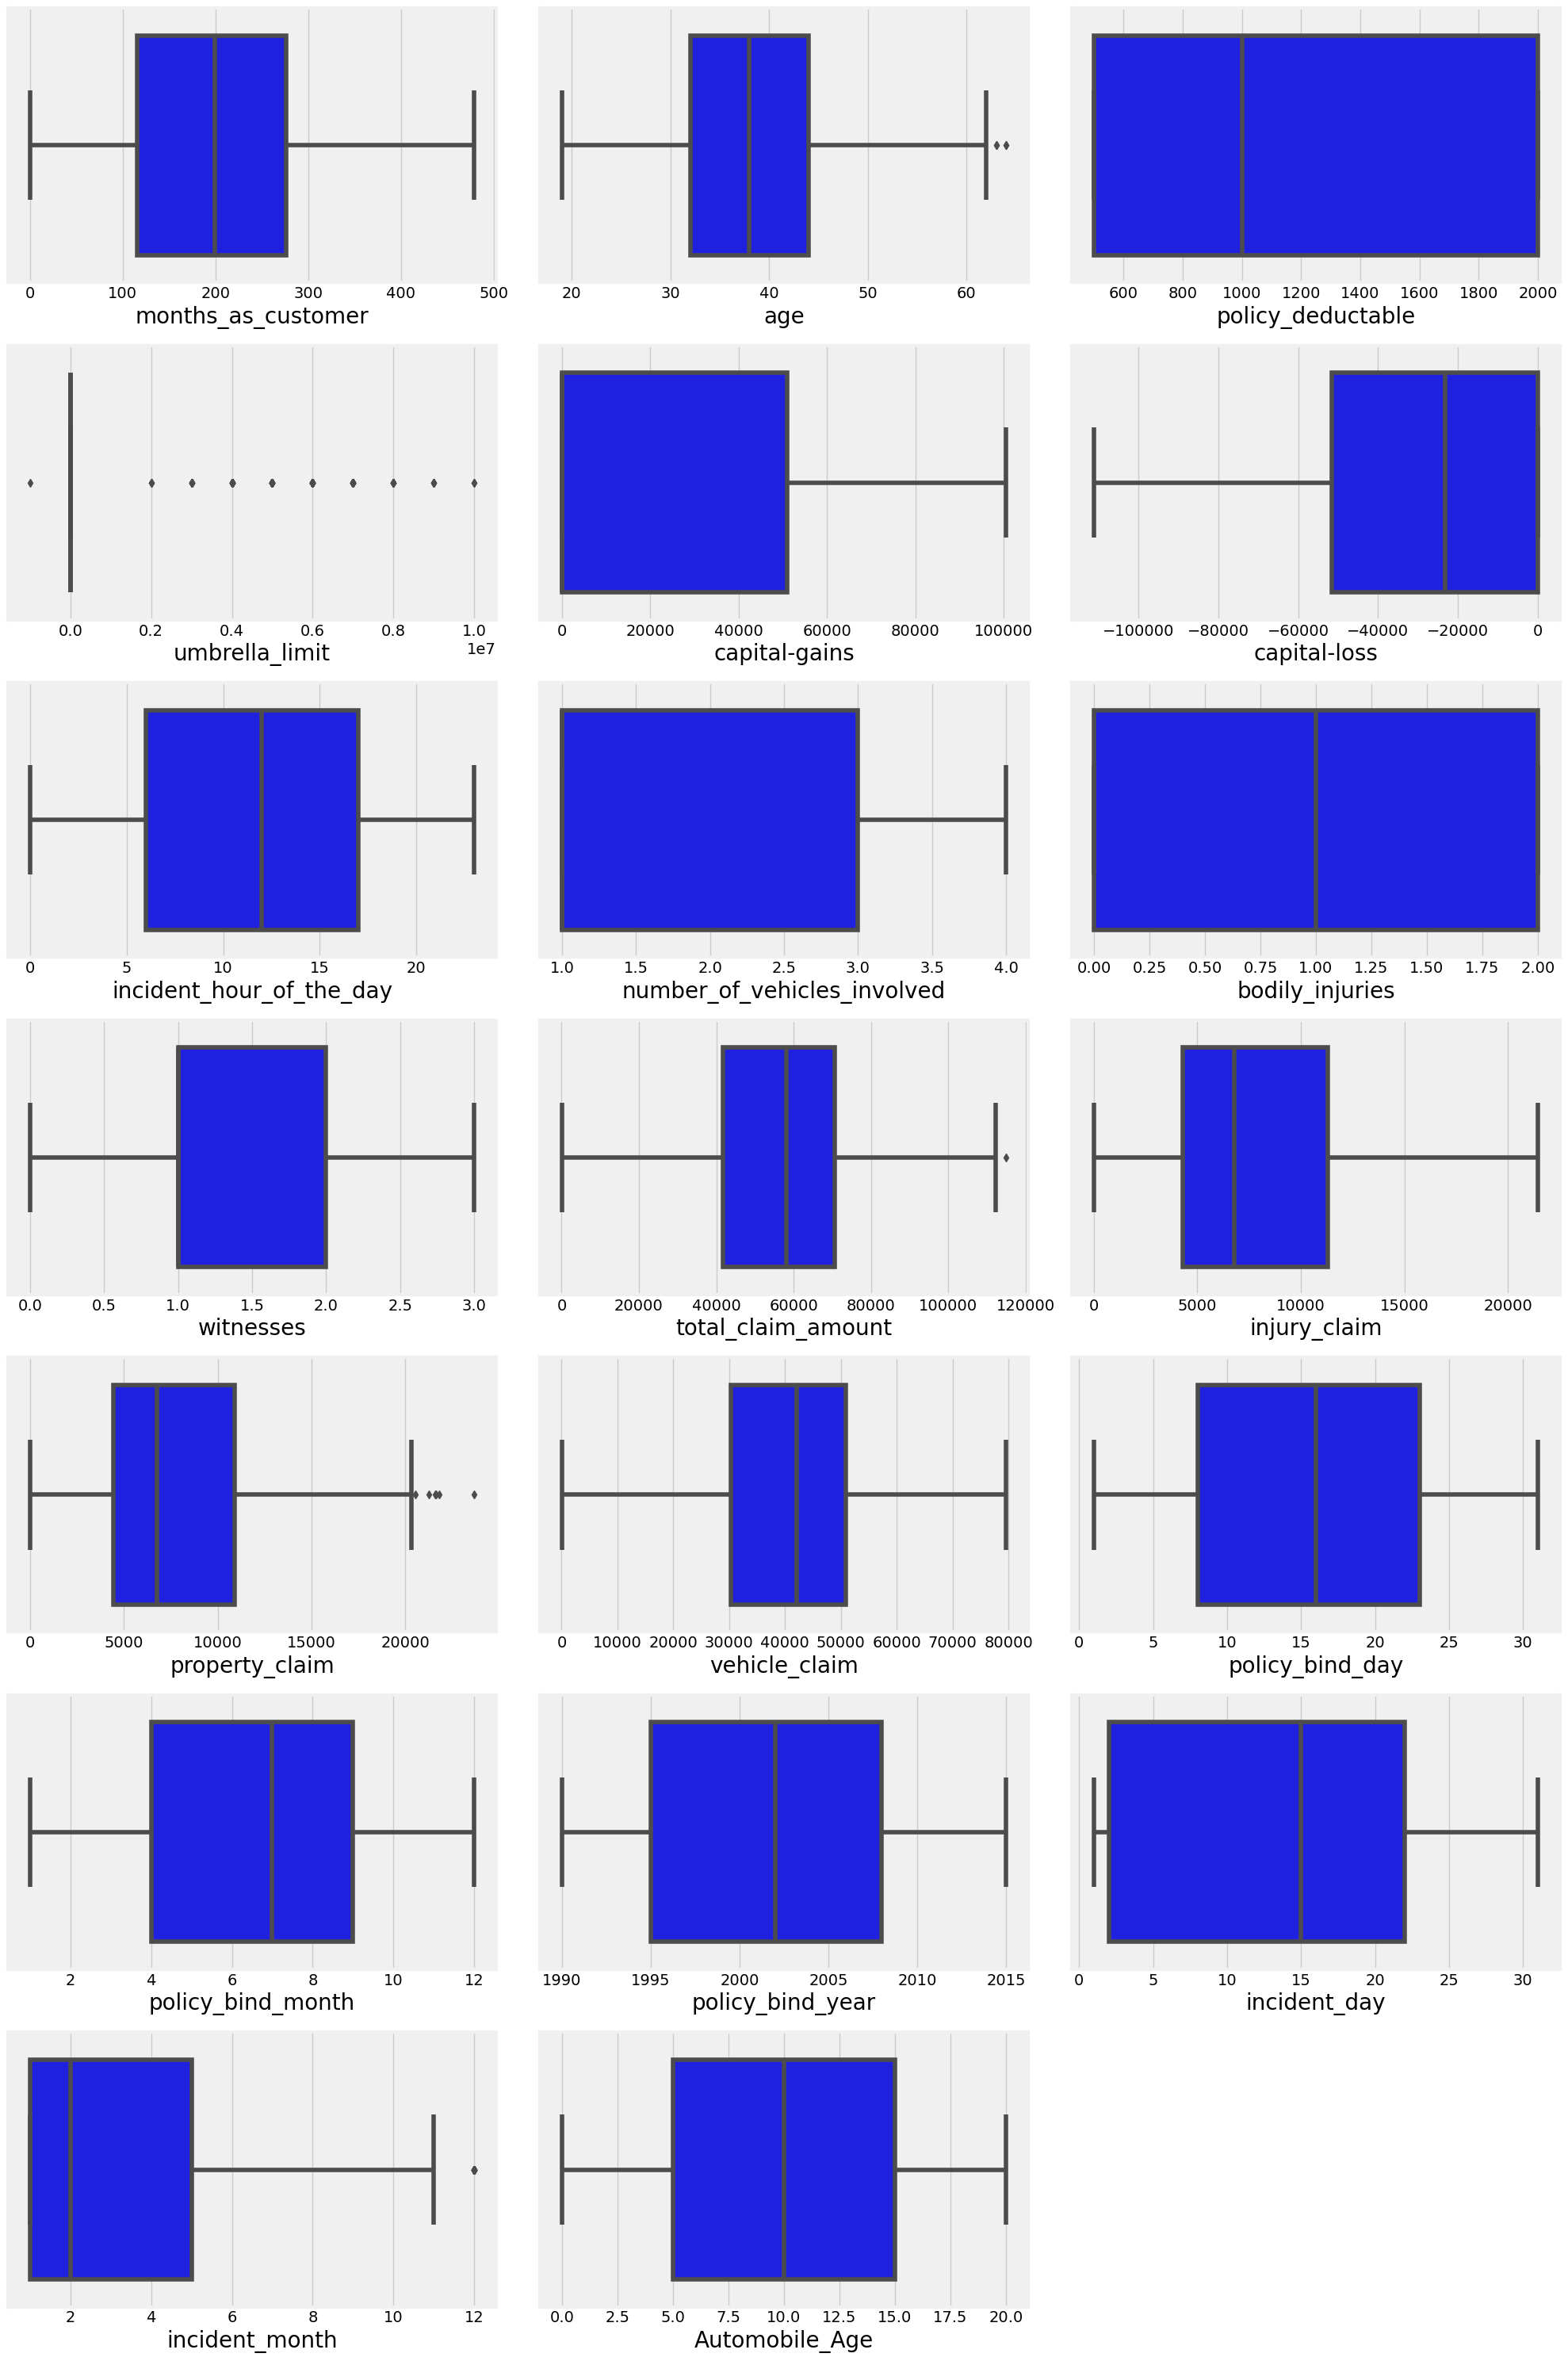

In [77]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[col], color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Outliers Detection and Removal

In [78]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removing outliers: ',df.shape)
print('Shape of the dataframe after removing outliers: ',df1.shape)
print('Percentage of data loss post outlier removal:',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## 2.Skewness of features

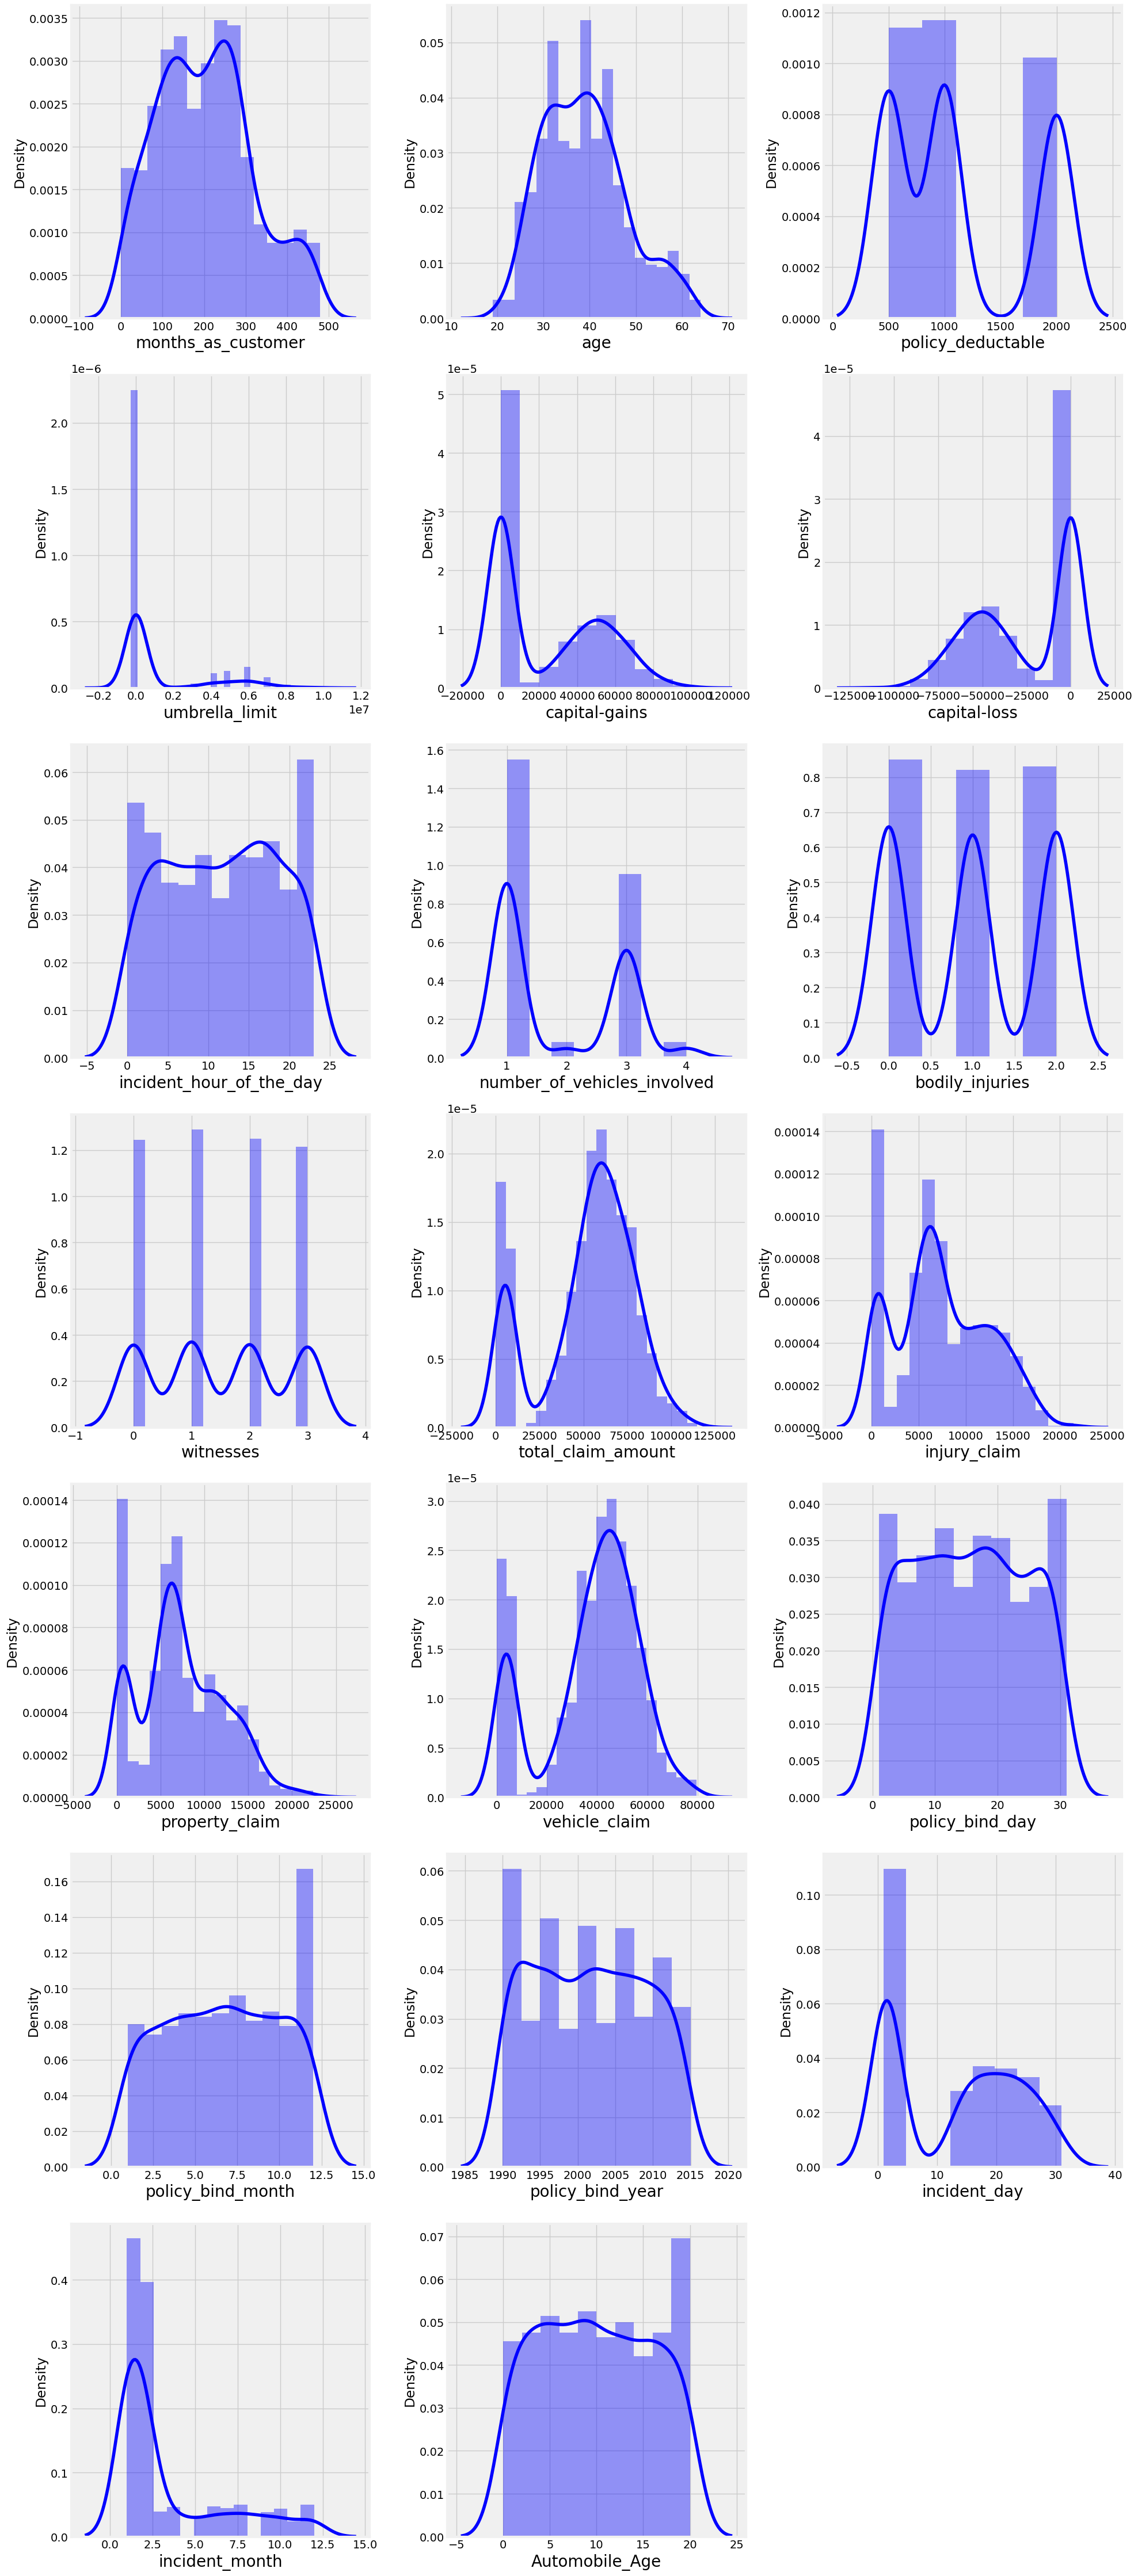

In [79]:
plt.figure(figsize=(20,45),facecolor='white')
sns.set_palette('rainbow')
plotnumber=1

for column in Numerical:
    if plotnumber<21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [80]:
df[Numerical].skew()

KeyError: "['policy_annual_premium'] not in index"

In [78]:
skew= ['total_claim_amount', 'vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df[skew]= scaler.fit_transform(df[skew].values)

## 3.Correlation

In [79]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.072787 -0.075642      0.052438   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.005488 -0.003408     -0.008465   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.022146 -0.020441      0.069017   
total_claim_amount                     0.062495  0.070386     -0.006305   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061308  0.062764      0.001464   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
fraud_reported                         0.020544  0.012143      0.029432   
CSL_Personal                          -0.026819 -0.015185      0.001027   
CSL_Accidental                         0.008876  0.009876      0.028838   
policy_bind_day                        0.051728  0.053869      0.002277   
policy_bind_month                      0.005750  0.015501      0.071450   
policy_bind_year                      -0.048276 -0.037444     -0.007276   
incident_day                          -0.011092 -0.006131      0.014745   
incident_month                         0.024659  0.023404      0.023643   
Automobile_Age                         0.000292 -0.001354     -0.002114   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_state                          0.010033               0.012455   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_sex                          -0.009733               0.038853   
insured_education_level               0.015217              -0.019715   
insured_occupation                   -0.046733               0.035922   
insured_hobbies                       0.004061              -0.018019   
insured_relationship                 -0.022945               0.001925   
capital-gains                         0.035212              -0.013738   
capi

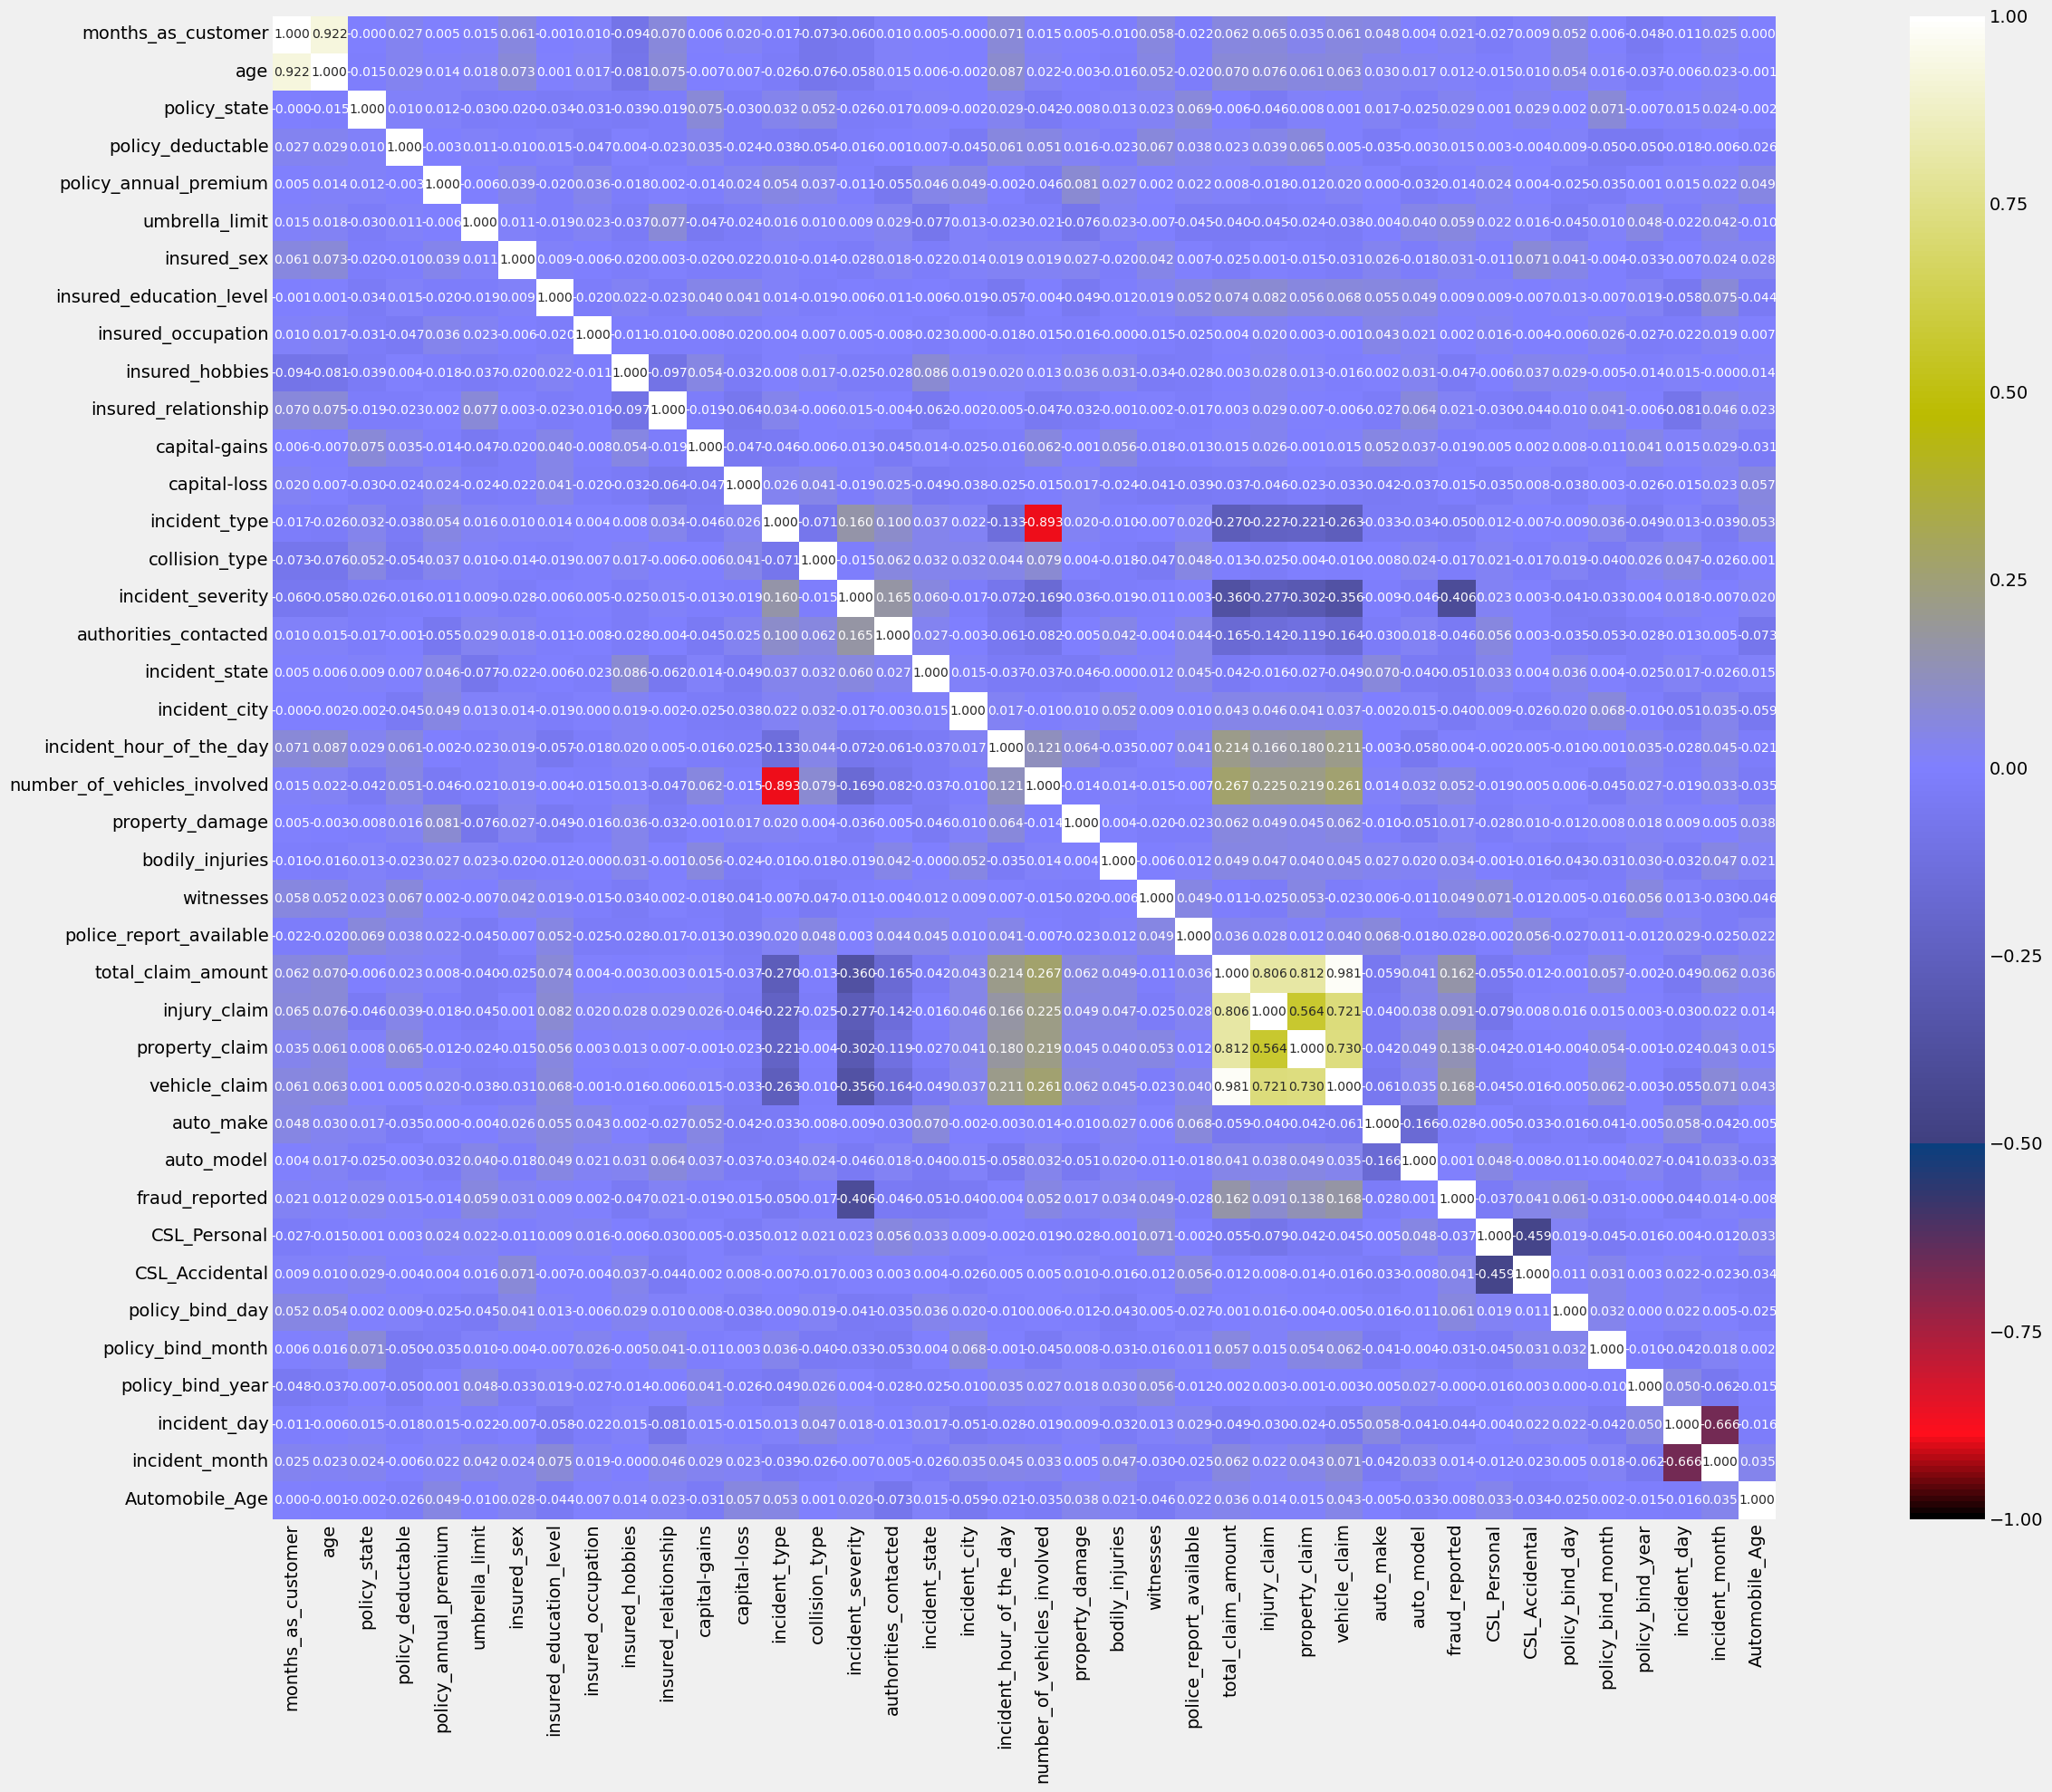

In [80]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
           annot_kws= {'size' : 10}, cmap = 'gist_stern')
plt.show()

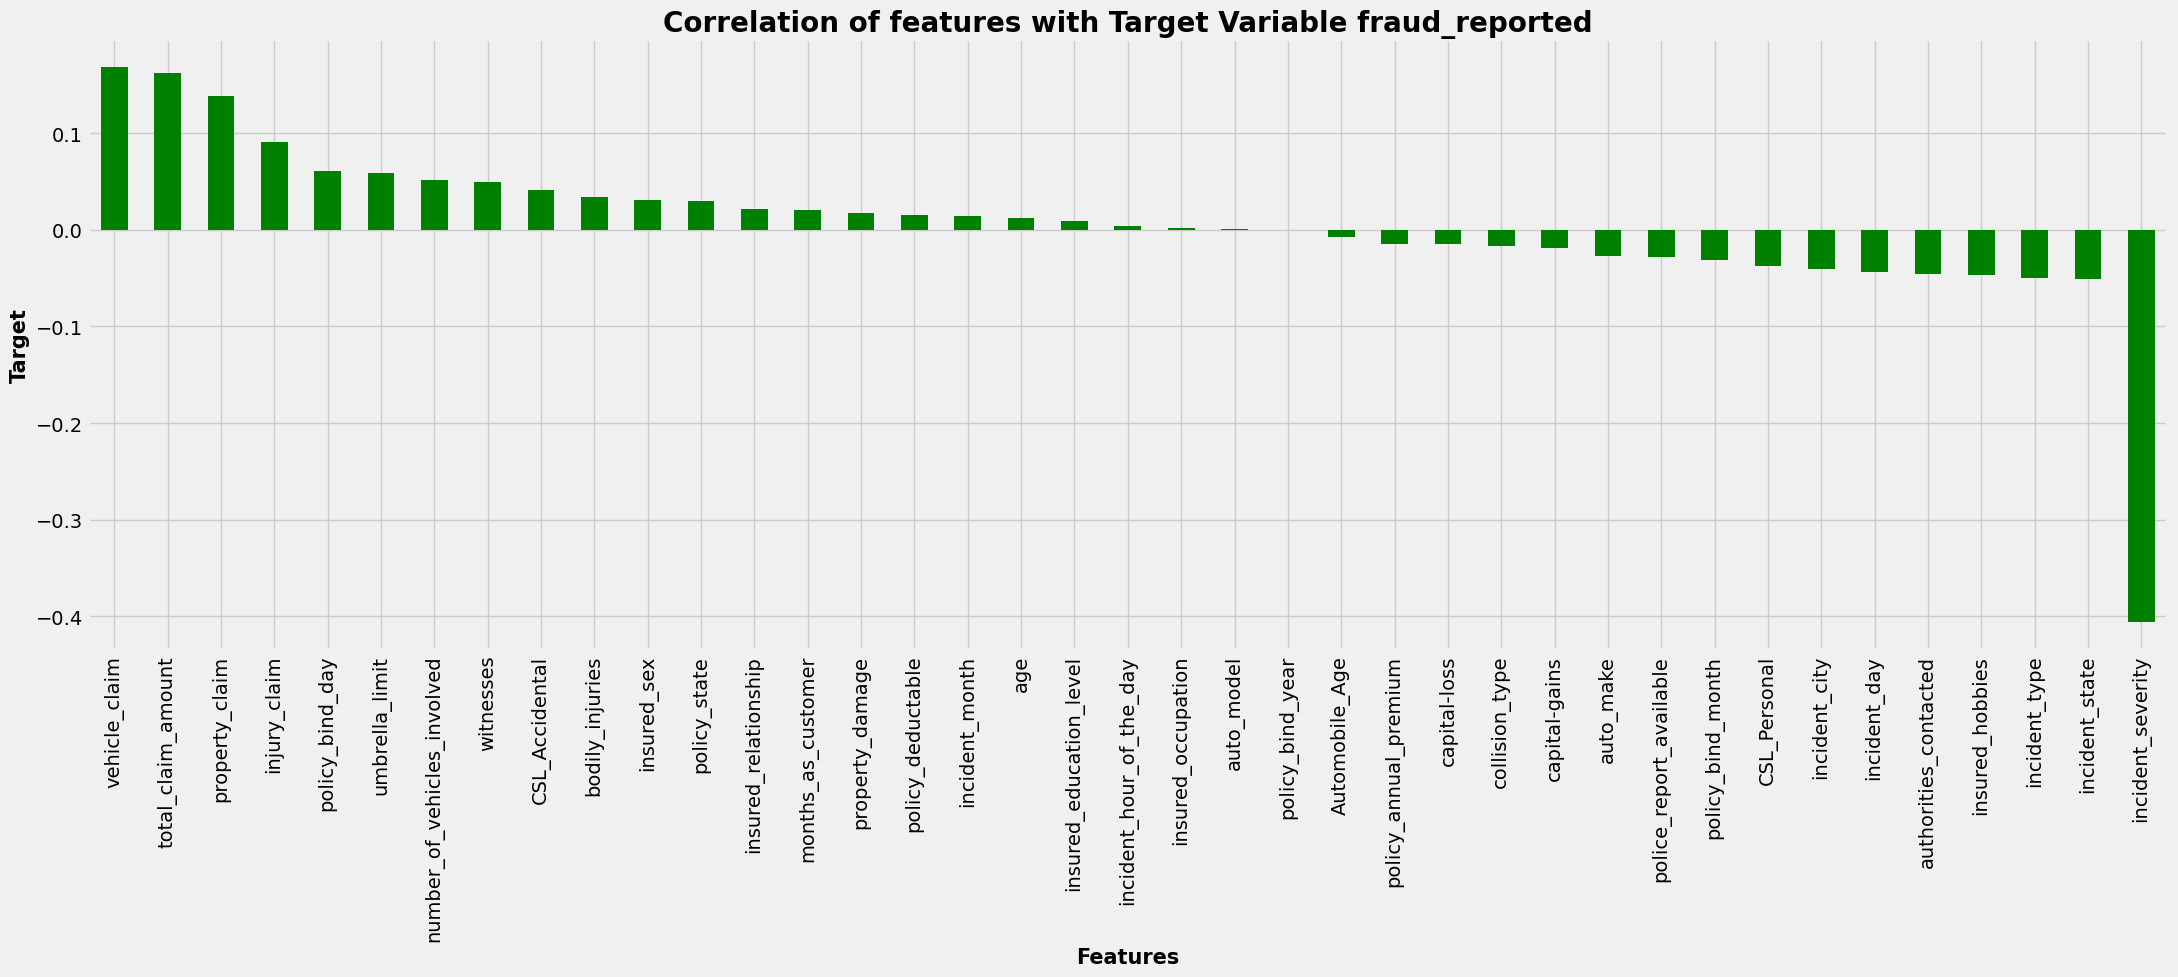

In [81]:
plt.figure(figsize= (22,10))
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind= 'bar', color= 'g')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.ylabel('Target', fontsize=15, fontweight='bold')
plt.title('Correlation of features with Target Variable fraud_reported', fontsize= 20, fontweight='bold')
plt.show()

## Blancing Imblanced target feature

In [82]:
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

### Balancing using SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
X = df.drop(['fraud_reported'], axis=1)
Y = df['fraud_reported']

In [85]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

NameError: name 'SMOTE' is not defined

In [82]:
Y.value_counts()

NameError: name 'Y' is not defined

## Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

NameError: name 'X' is not defined

## Checking Variance_inflation_factor

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif['Features']= X.columns
vif

NameError: name 'X' is not defined

# PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

NameError: name 'X_scale' is not defined

In [86]:
pca_new = PCA(n_components = 28)
x_new = pca_new.fit_transform(X_scale)

NameError: name 'X_scale' is not defined

In [87]:
principle_x =pd.DataFrame(x_new, columns=np.arange(28))

NameError: name 'x_new' is not defined

# Machine Learnings Model Building

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [89]:
X_train, X_test, Y_train, y_test = train_test_split(principle_x, Y, random_state=42, test_size=0.33)
print('Training feature matrix size:', X_train.shape)
print('Training target vector size:', Y_train.shape)
print('Test feature matrix size:', X_test.shape)
print('Test target vector size:', Y_test.shape)

NameError: name 'principle_x' is not defined

## Finding best Random state

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

## Logistics Regression Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

## Finding best N_neighbors for KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import neighbors
from math import sqrt 
from sklearn.metrics import mean_squared_error
rmse_val =[]
for K in range(10):
    K=K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit (x_train,y_train)
    y_pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k=', K, 'is:', error)

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='r', linestyle= 'dashed', marker='o', markerfacecolor='g', markersize=10)

## Applying other classification algorithm

In [ ]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('=========================================================================')

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Valdation Score', m, ':'+'\033[0m\n]')
    print('Score :' , score)
    print('Mean Score:', score.mean())
    print('Std deviation :', score.std())
    print('\n')
    print('========================================================================')

## Hyper Parameter Tunning: GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'criterion': ['gini', 'entropy'],
            'min_samples_split':[3,5,8,11],
            'max_depth' : [10,20,30],
            'n_estimators': [100,200,300,400]
            }

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose=10)
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

# Final Model

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split =8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test, Y_test)
plt.legend(prop= {'size':11}, loc= 'lower right')
plt.title('AOC ROC Curve of final model', fontsize=20, fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n]', auc_score)

# Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod, 'Insurance_claims_Final.pkl')